<a href="https://colab.research.google.com/github/SahputraS/Flu-Forecast/blob/main/Flu_Forecast_VAR_(Operational).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
needed.packages <- c('MLmetrics',
                     'janitor',
                     'fpp2',
                     'forecast',
                     'vars',
                     'kableExtra',
                     'geosphere',
                     'sp',
                     'ggdendro',
                     'colorspace',
                     'lubridate',
                     'tidyverse',
                     'imputeTS',
                     'magrittr',
                     'BigVAR',
                     'webshot',
                     'readr',
                     'patchwork',
                     'zoo',
                     'reshape2',
                     'ISOweek',
                     'forcats',
                     'scales',
                     'readr',
                     'httr2',
                     'forcats',
                     'ggbreak')

new.packages <- needed.packages[!(needed.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)) install.packages(new.packages, repos = "http://cran.us.r-project.org")
lapply(needed.packages, library, character.only = TRUE)

[[1]]
 [1] "ggbreak"     "httr2"       "scales"      "ISOweek"     "reshape2"   
 [6] "patchwork"   "webshot"     "BigVAR"      "lattice"     "magrittr"   
[11] "imputeTS"    "forcats"     "stringr"     "dplyr"       "purrr"      
[16] "readr"       "tidyr"       "tibble"      "tidyverse"   "lubridate"  
[21] "colorspace"  "ggdendro"    "sp"          "geosphere"   "kableExtra" 
[26] "vars"        "lmtest"      "urca"        "strucchange" "sandwich"   
[31] "zoo"         "MASS"        "expsmooth"   "fma"         "forecast"   
[36] "ggplot2"     "fpp2"        "janitor"     "MLmetrics"   "stats"      
[41] "graphics"    "grDevices"   "utils"       "datasets"    "methods"    
[46] "base"       

[[2]]
 [1] "ggbreak"     "httr2"       "scales"      "ISOweek"     "reshape2"   
 [6] "patchwork"   "webshot"     "BigVAR"      "lattice"     "magrittr"   
[11] "imputeTS"    "forcats"     "stringr"     "dplyr"       "purrr"      
[16] "readr"       "tidyr"       "tibble"      "tidyverse"   "lubridate"  
[21] "colorspace"  "ggdendro"    "sp"          "geosphere"   "kableExtra" 
[26] "vars"        "lmtest"      "urca"        "strucchange" "sandwich"   
[31] "zoo"         "MASS"        "expsmooth"   "fma"         "forecast"   
[36] "ggplot2"     "fpp2"        "janitor"     "MLmetrics"   "stats"      
[41] "graphics"    "grDevices"   "utils"       "datasets"    "methods"    
[46] "base"       

[[3]]
 [1] "ggbreak"     "httr2"       "scales"      "ISOweek"     "reshape2"   
 [6] "patchwork"   "webshot"     "BigVAR"      "lattice"     "magrittr"   
[11] "imputeTS"    "forcats"     "stringr"     "dplyr"       "purrr"      
[16] "readr"       "tidyr"       "tibble"      "tidyverse"   "lubridate"  
[21] "colorspace"  "ggdendro"    "sp"          "geosphere"   "kableExtra" 
[26] "vars"        "lmtest"      "urca"        "strucchange" "sandwich"   
[31] "zoo"         "MASS"        "expsmooth"   "fma"         "forecast"   
[36] "ggplot2"     "fpp2"        "janitor"     "MLmetrics"   "stats"      
[41] "graphics"    "grDevices"   "utils"       "datasets"    "methods"    
[46] "base"       

[[4]]
 [1] "ggbreak"     "httr2"       "scales"      "ISOweek"     "reshape2"   
 [6] "patchwork"   "webshot"     "BigVAR"      "lattice"     "magrittr"   
[11] "imputeTS"    "forcats"     "stringr"     "dplyr"       "purrr"      
[16] "readr"       "tidyr"       "tibble"      "tidyverse"   "lubridate"  
[21] "colorspace"  "ggdendro"    "sp"          "geosphere"   "kableExtra" 
[26] "vars"        "lmtest"      "urca"        "strucchange" "sandwich"   
[31] "zoo"         "MASS"        "expsmooth"   "fma"         "forecast"   
[36] "ggplot2"     "fpp2"        "janitor"     "MLmetrics"   "stats"      
[41] "graphics"    "grDevices"   "utils"       "datasets"    "methods"    
[46] "base"       

[[5]]
 [1] "ggbreak"     "httr2"       "scales"      "ISOweek"     "reshape2"   
 [6] "patchwork"   "webshot"     "BigVAR"      "lattice"     "magrittr"   
[11] "imputeTS"    "forcats"     "stringr"     "dplyr"       "purrr"      
[16] "readr"       "tidyr"       "tibble"      "tidyverse"   "lubridate"  
[21] "colorspace"  "ggdendro"    "sp"          "geosphere"   "kableExtra" 
[26] "vars"        "lmtest"      "urca"        "strucchange" "sandwich"   
[31] "zoo"         "MASS"        "expsmooth"   "fma"         "forecast"   
[36] "ggplot2"     "fpp2"        "janitor"     "MLmetrics"   "stats"      
[41] "graphics"    "grDevices"   "utils"       "datasets"    "methods"    
[46] "base"       

[[6]]
 [1] "ggbreak"     "httr2"       "scales"      "ISOweek"     "reshape2"   
 [6] "patchwork"   "webshot"     "BigVAR"      "lattice"     "magrittr"   
[11] "imputeTS"    "forcats"     "stringr"     "dplyr"       "purrr"      
[16] "readr"       "tidyr"       "tibble"      "tidyverse"   "lubridate"  
[21] "colorspace"  "ggdendro"    "sp"          "geosphere"   "kableExtra" 
[26] "vars"        "lmtest"      "urca"        "strucchange" "sandwich"   
[31] "zoo"         "MASS"        "expsm

## Import Data

In [92]:
# Check raw data
# url <- "https://raw.githubusercontent.com/european-modelling-hubs/RespiCast-SyndromicIndicators/main/target-data/latest-ILI_incidence.csv"
url <- "https://raw.githubusercontent.com/european-modelling-hubs/RespiCast-SyndromicIndicators/main/target-data/ERVISS/snapshots/2024-10-11-ILI_incidence.csv"
ili_all <- read_csv(url, show_col_types = FALSE)
head(ili_all)

target        location truth_date year_week value 
1 ILI incidence AT       2024-04-07 2024-W14  1512.6
2 ILI incidence AT       2024-03-31 2024-W13  1629.1
3 ILI incidence AT       2024-03-24 2024-W12  2179.8
4 ILI incidence AT       2024-03-17 2024-W11  1798.0
5 ILI incidence AT       2024-03-10 2024-W10  1790.0
6 ILI incidence AT       2024-03-03 2024-W09  2338.0

In [93]:
tail(ili_all)

target        location truth_date year_week value
1 ILI incidence ES       2014-11-09 2014-W45  11.0 
2 ILI incidence ES       2014-11-02 2014-W44   9.5 
3 ILI incidence ES       2014-10-26 2014-W43  11.8 
4 ILI incidence ES       2014-10-19 2014-W42  10.2 
5 ILI incidence ES       2014-10-12 2014-W41  10.1 
6 ILI incidence ES       2014-10-05 2014-W40   7.0

## Data Cleaning

In [94]:
ili_data0 <- ili_all %>%
  select(truth_date, location, value) %>%
  rename(date = truth_date) %>%
  arrange(date)

head(ili_data0)

date       location value
1 2014-10-05 AT       589.6
2 2014-10-05 BE        13.8
3 2014-10-05 HR         0.0
4 2014-10-05 CY       700.0
5 2014-10-05 CZ        16.6
6 2014-10-05 DK        16.3

In [95]:
min_date0 <- min(ili_data0$date, na.rm = TRUE)
max_date0 <- max(ili_data0$date, na.rm = TRUE)

In [96]:
min_date0

[1] "2014-10-05"

In [97]:
max_date0

[1] "2024-10-06"

In [98]:
week_seq <- seq.Date(from = max_date0, to = min_date0, by = "-1 week")

In [99]:
# This function marks the series of 0s and NaNs that is too long and mark it as suspicious
mark_runs <- function(x, k = 4, combine = TRUE) {
  if (combine) {
    z <- is.na(x) | x == 0
    r <- rle(z)
    mask <- inverse.rle(list(values = r$values & r$lengths >= k, lengths = r$lengths))
    as.logical(mask)
  } else {
    r_na <- rle(is.na(x)); m_na <- inverse.rle(list(values = r_na$values & r_na$lengths >= k,
                                                    lengths = r_na$lengths))
    r_0  <- rle(!is.na(x) & x == 0); m_0 <- inverse.rle(list(values = r_0$values & r_0$lengths >= k,
                                                             lengths = r_0$lengths))
    as.logical(m_na | m_0)
  }
}

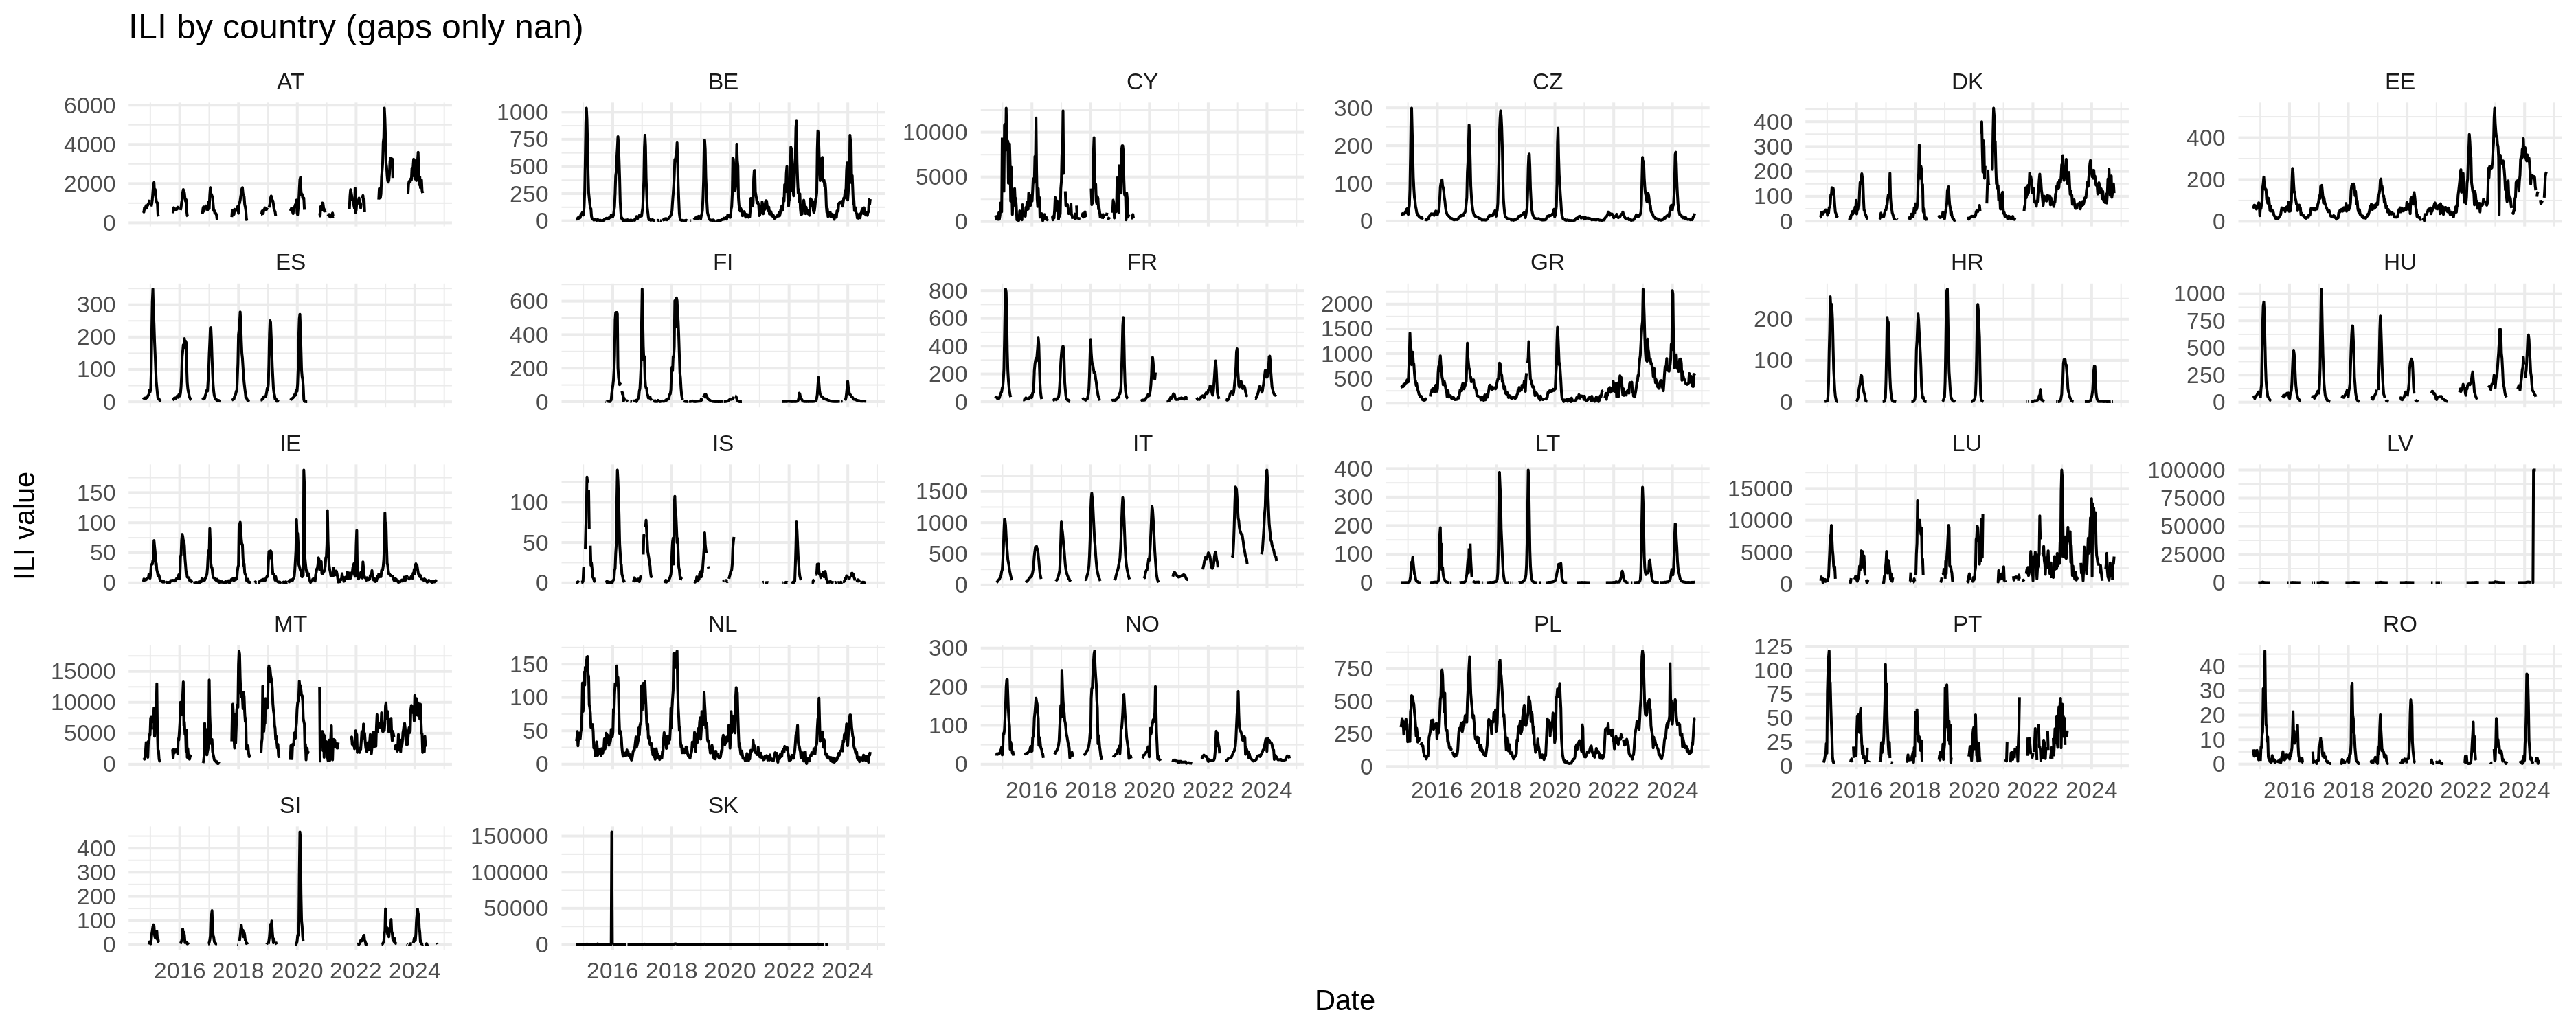

In [100]:
ili_prep <- ili_data0 %>%
  group_by(location) %>%
  complete(date = seq.Date(min(date), max(date), by = "week")) %>%
  mutate(value = ifelse(value == 0, NA, value))  %>%
  arrange(location, date) %>%
  ungroup()

options(repr.plot.width = 25, repr.plot.height = 10, repr.plot.res = 150)

ggplot(ili_prep, aes(x = date, y = value)) +
  geom_line(na.rm = FALSE) +
  facet_wrap(~ location, scales = "free_y") +
  labs(title = "ILI by country (gaps only nan)", x = "Date", y = "ILI value") +
  theme_minimal(base_size=20)

From the graph above, there are anomalies in some countries:


1.   LV on 2024 -> update from the 'latest-ILI-incidence' files
2.   SI on 2020 -> prob bcs of covid, which the period will be cut out later anyway
3.  SK on 2016 - 2017 -> the country will not be part of forecast anyway

In [102]:
ili_prep2 <- ili_data0 %>%
  group_by(location) %>%
  complete(date = seq.Date(min(date), max(date), by = "week")) %>%
  mutate(sus = .env$mark_runs(value, k = 4, combine = TRUE),
         sus = ifelse(is.na(sus), FALSE, sus),
         value_clean = ifelse(sus, NA_real_, value))

Warning message:
“Removed 2097 rows containing missing values or values outside the scale range
(`geom_point()`).”


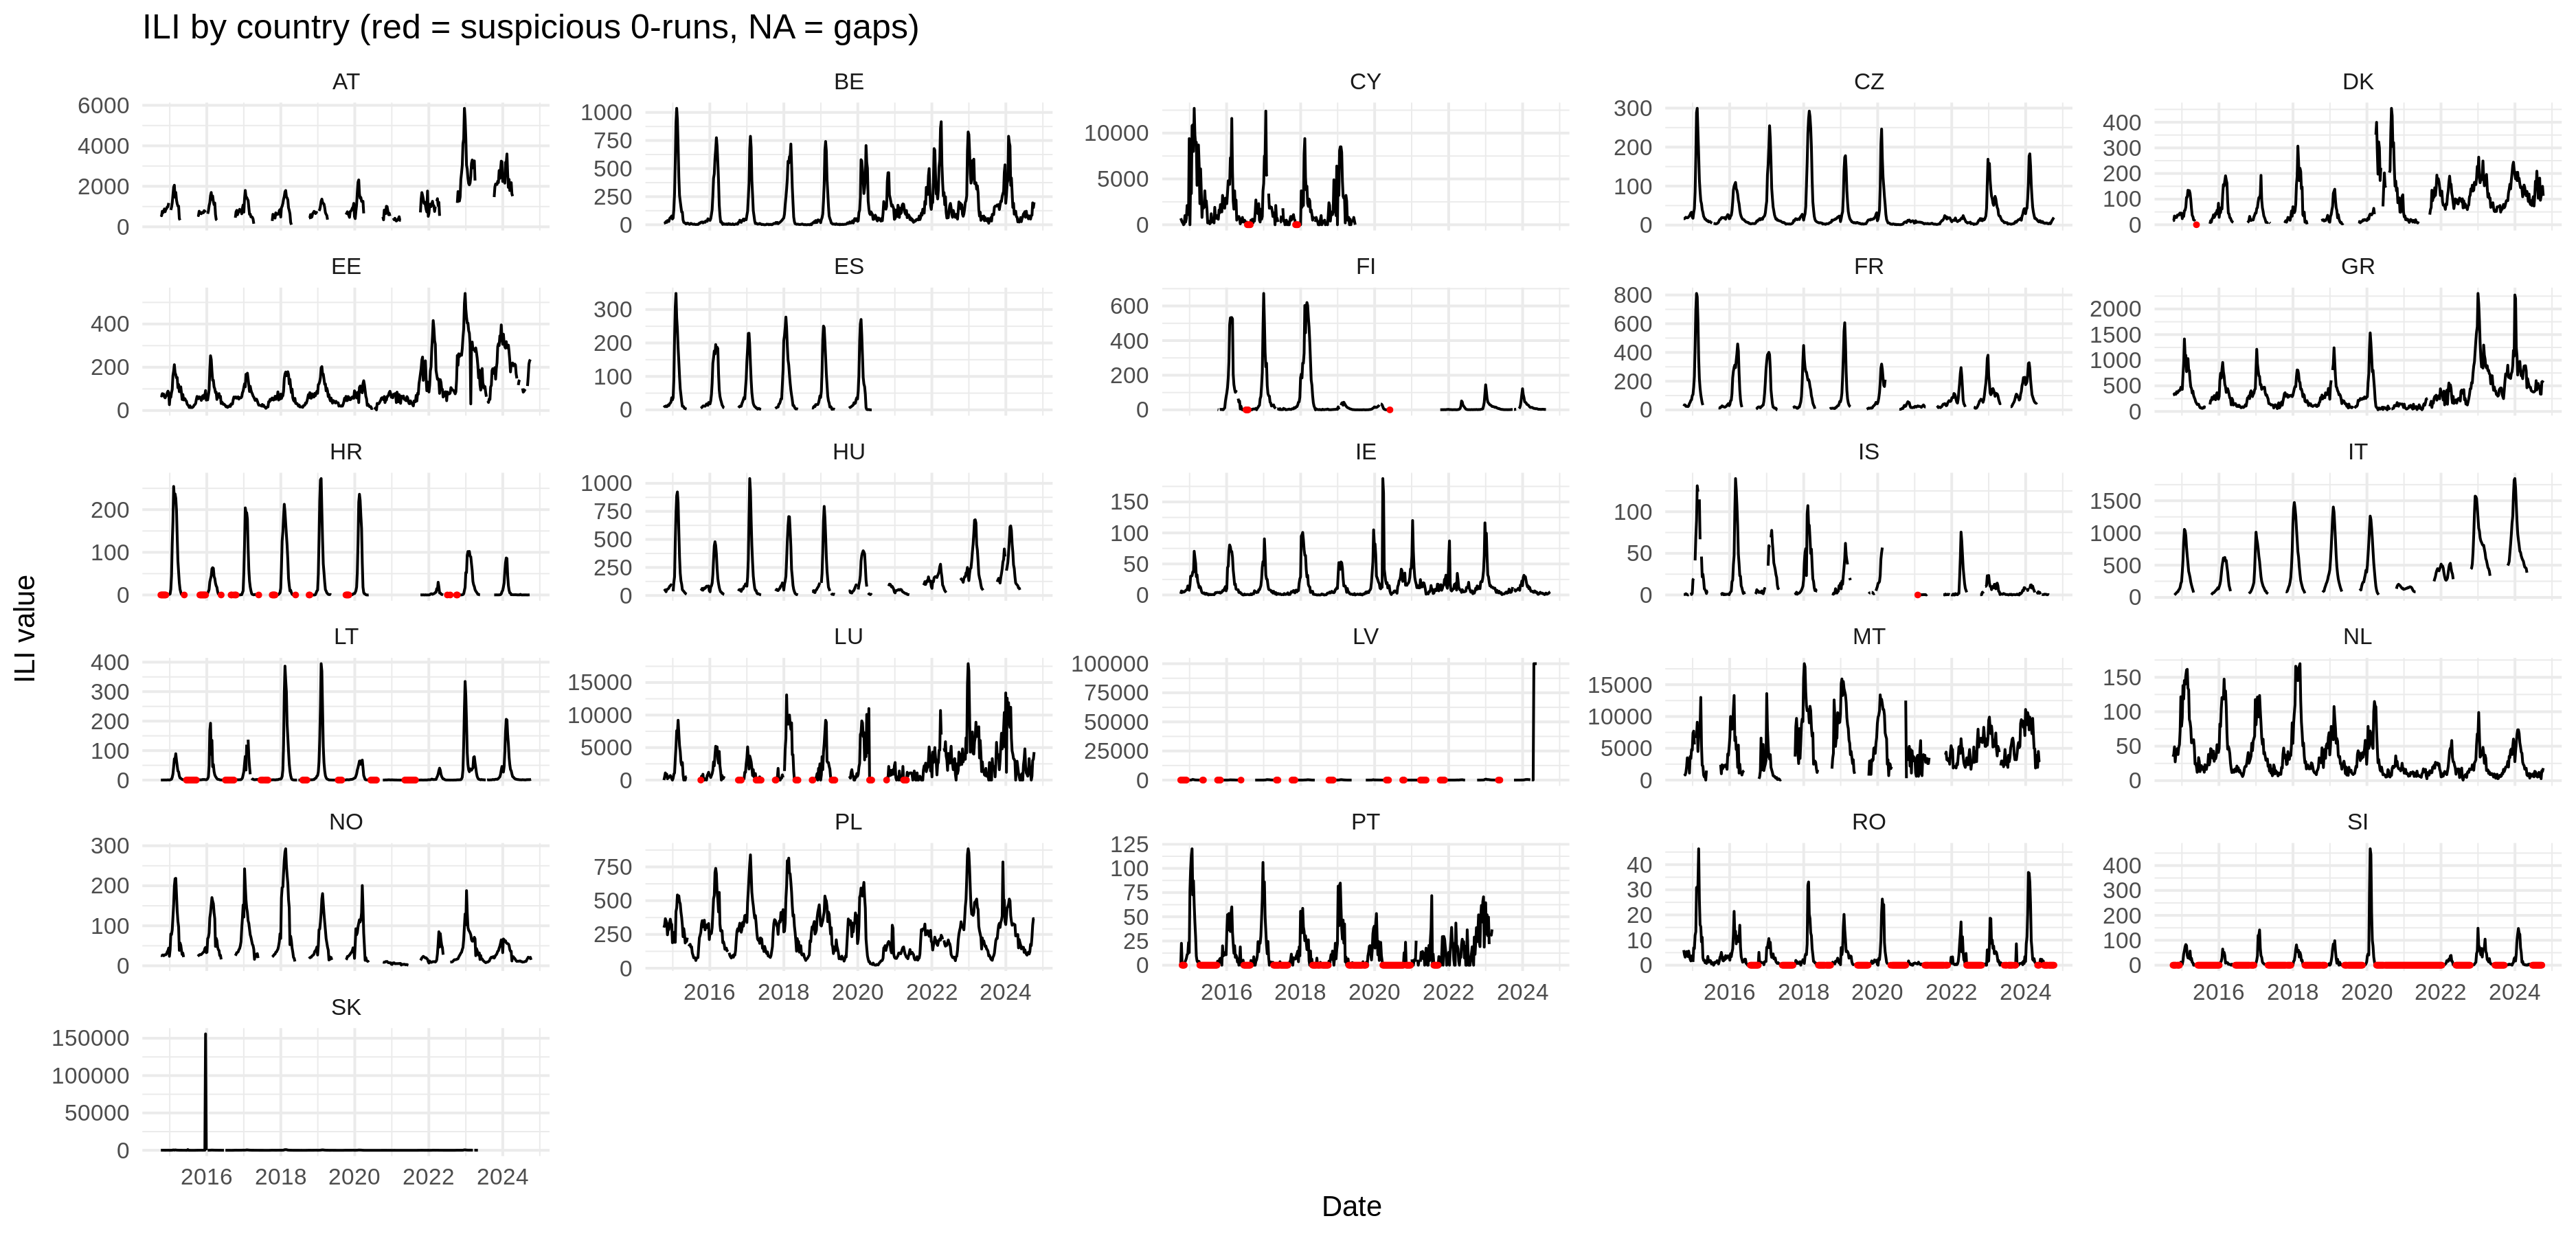

In [103]:
options(repr.plot.width = 25, repr.plot.height = 12, repr.plot.res = 150)

ggplot(ili_prep2, aes(x = date)) +
  geom_line(aes(y = value), colour = "black", na.rm = FALSE) +
  geom_point(data = subset(ili_prep2, sus), aes(y = value), colour = "red", size = 1) +
  facet_wrap(~ location, scales = "free_y",  ncol = 5) +
  labs(title = "ILI by country (red = suspicious 0-runs, NA = gaps)",
       x = "Date", y = "ILI value") +
  theme_minimal(base_size = 20)

Warning message:
“Removed 2097 rows containing missing values or values outside the scale range
(`geom_point()`).”


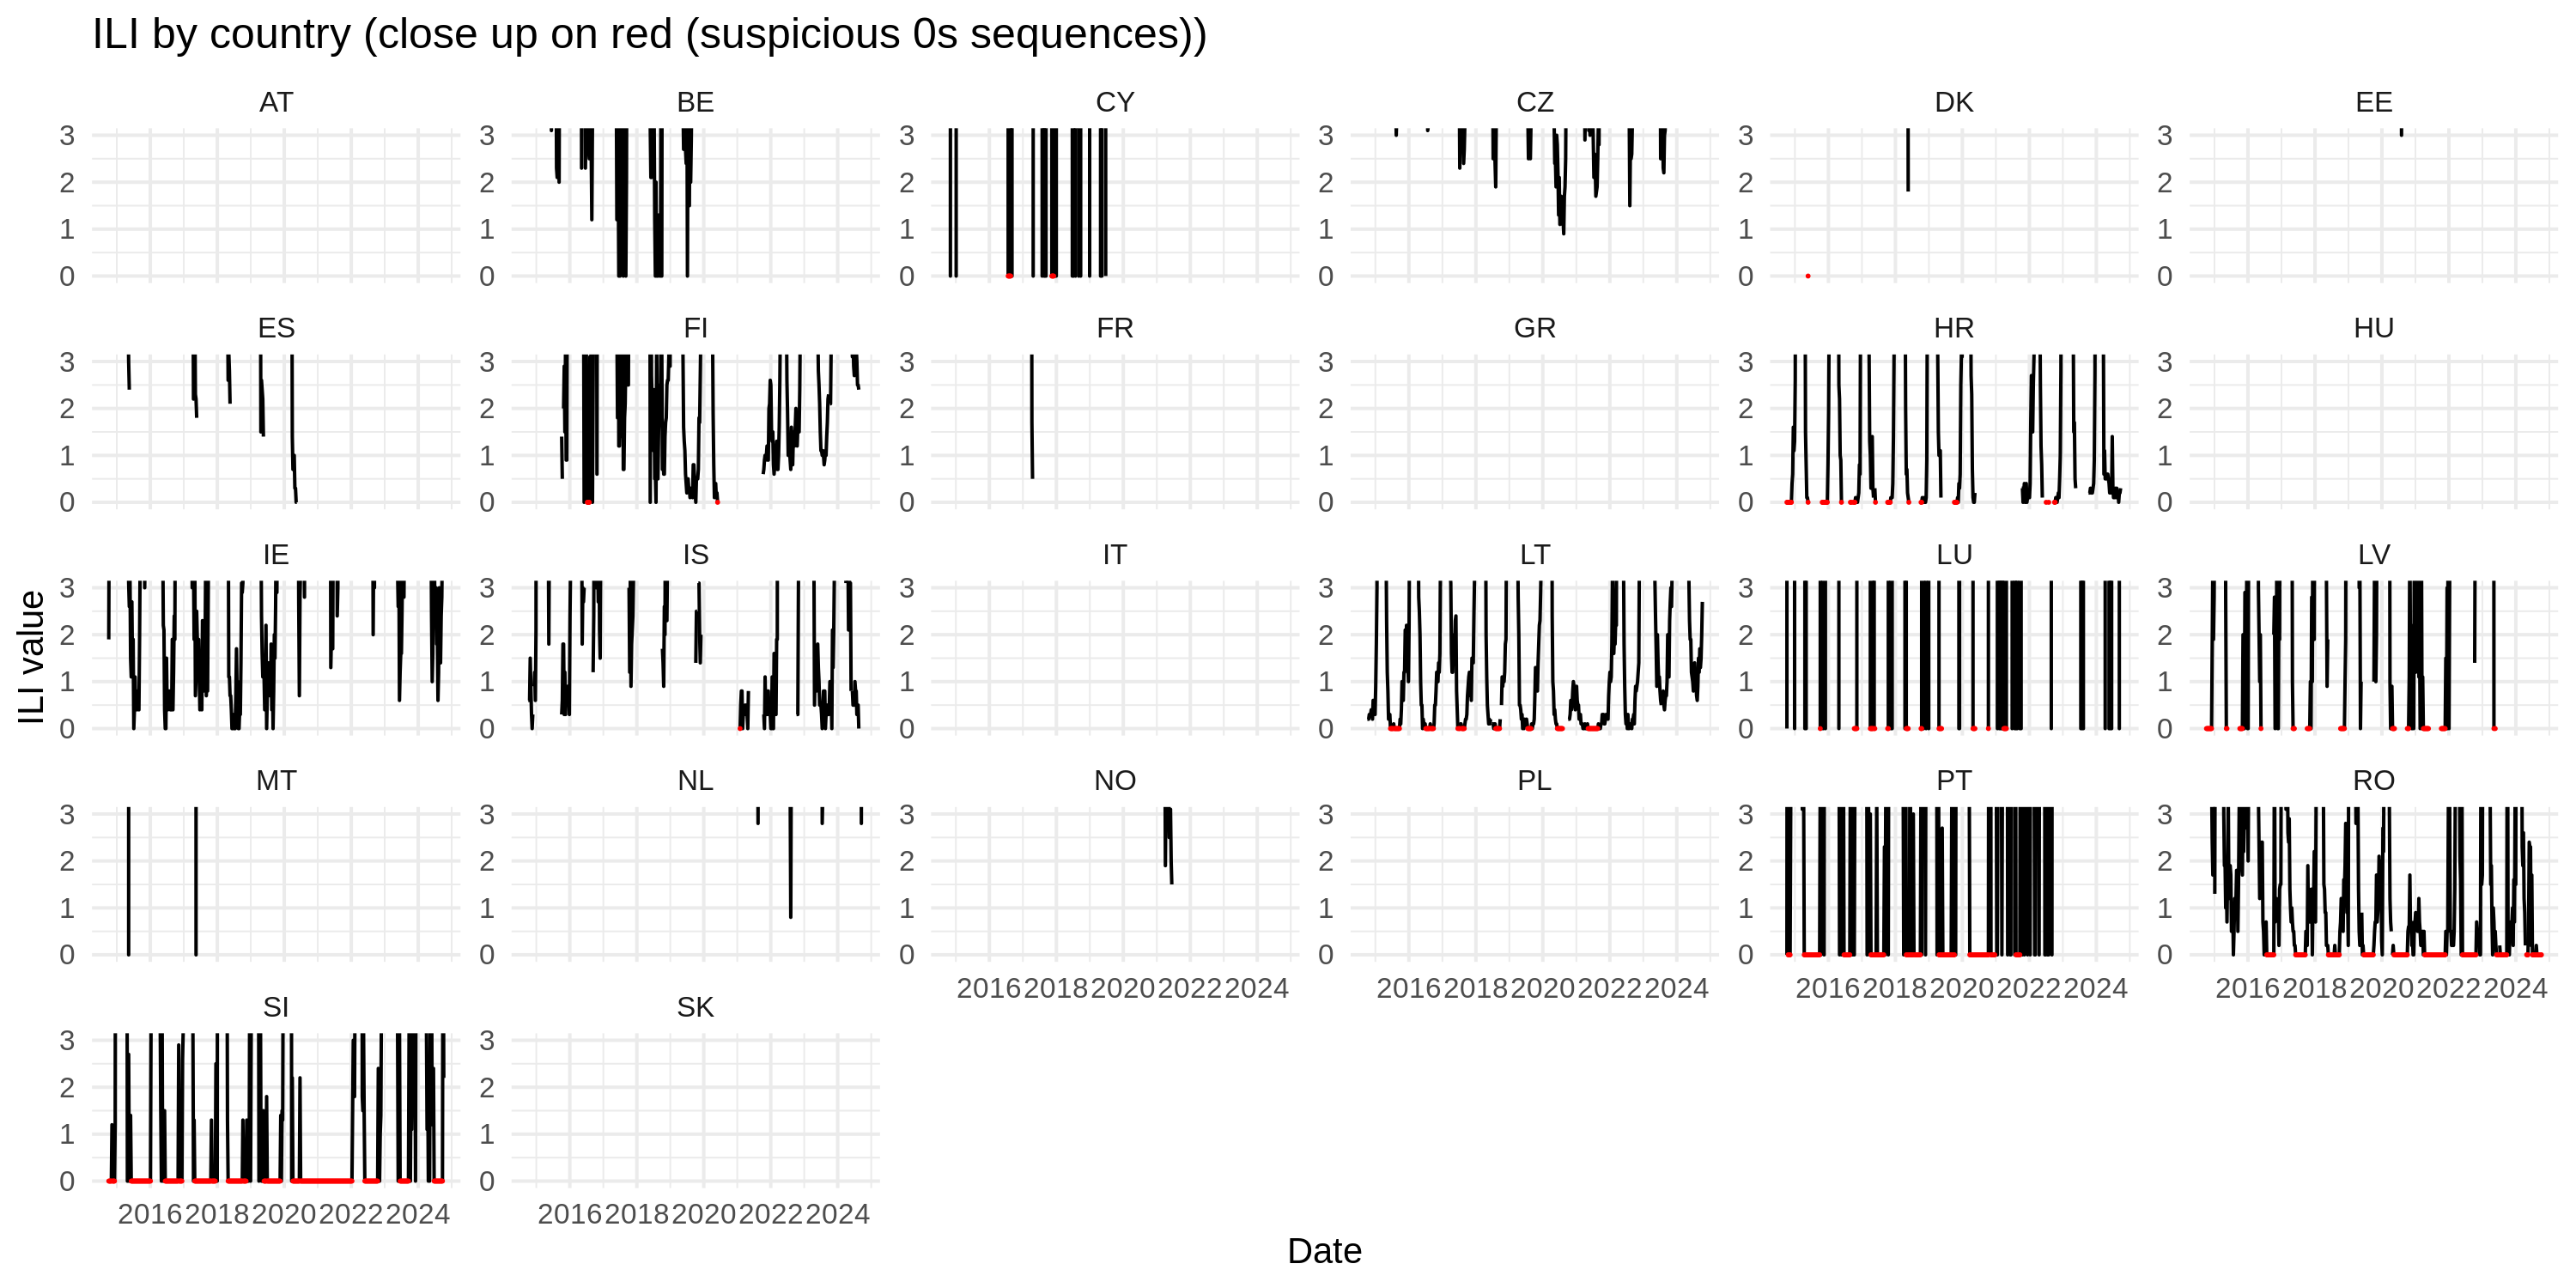

In [104]:
options(repr.plot.width = 20, repr.plot.height = 10, repr.plot.res = 150)

ggplot(ili_prep2, aes(x = date)) +
  geom_line(aes(y = value), colour = "black", na.rm = FALSE) +
  geom_point(data = subset(ili_prep2, sus), aes(y = value), colour = "red", size = 0.1) +
  facet_wrap(~ location, scales = "free_y") +
  coord_cartesian(ylim = c(0, 3)) +
  labs(title = "ILI by country (close up on red (suspicious 0s sequences))",
       x = "Date", y = "ILI value") +
  theme_minimal(base_size = 20)

## Impute updated Data from the "latest-ILI-incidence" file

Initially the motivation is to update LV anomaly part in april - may 2024. But on a second thoughts it is better to update everyone, since this data is for training. So with the assumption that the latest data is more "correct", I therefore will update everyone.

In [105]:
url_latest <- "https://raw.githubusercontent.com/european-modelling-hubs/RespiCast-SyndromicIndicators/main/target-data/latest-ILI_incidence.csv"
ili_latest <- read_csv(url_latest, show_col_types = FALSE)
head(ili_latest)

target        location truth_date year_week value  data_source
1 ILI incidence AT       2025-10-12 2025-W41  1547.5 ERVISS     
2 ILI incidence AT       2025-10-05 2025-W40  1909.1 ERVISS     
3 ILI incidence AT       2025-04-06 2025-W14  1724.4 ERVISS     
4 ILI incidence AT       2025-03-30 2025-W13  1894.2 ERVISS     
5 ILI incidence AT       2025-03-23 2025-W12  2082.4 ERVISS     
6 ILI incidence AT       2025-03-16 2025-W11  1706.2 ERVISS

In [106]:
ili_update0 <- ili_latest %>% select(truth_date, location, value) %>%
                              rename(date = truth_date) %>%
                              arrange(date)

ili_update <- ili_update0 %>% filter(date <= as.Date(max_date0))

head(ili_update)

date       location value
1 2021-06-27 BE       26.7 
2 2021-06-27 CZ        3.5 
3 2021-06-27 EE       31.5 
4 2021-06-27 GR       33.5 
5 2021-06-27 IE        5.0 
6 2021-06-27 LT        0.0

In [107]:
by_keys <- c("date","location")
ili_data_updated <- rows_upsert(ili_data0, ili_update, by = by_keys)

In [108]:
ili_prep3 <- ili_data_updated %>%
  group_by(location) %>%
  complete(date = seq.Date(min(date), max(date), by = "week")) %>%
  mutate(sus = .env$mark_runs(value, k = 4, combine = TRUE),
         sus = ifelse(is.na(sus), FALSE, sus),
         value_clean = ifelse(sus, NA_real_, value))

Warning message:
“Removed 2312 rows containing missing values or values outside the scale range
(`geom_point()`).”


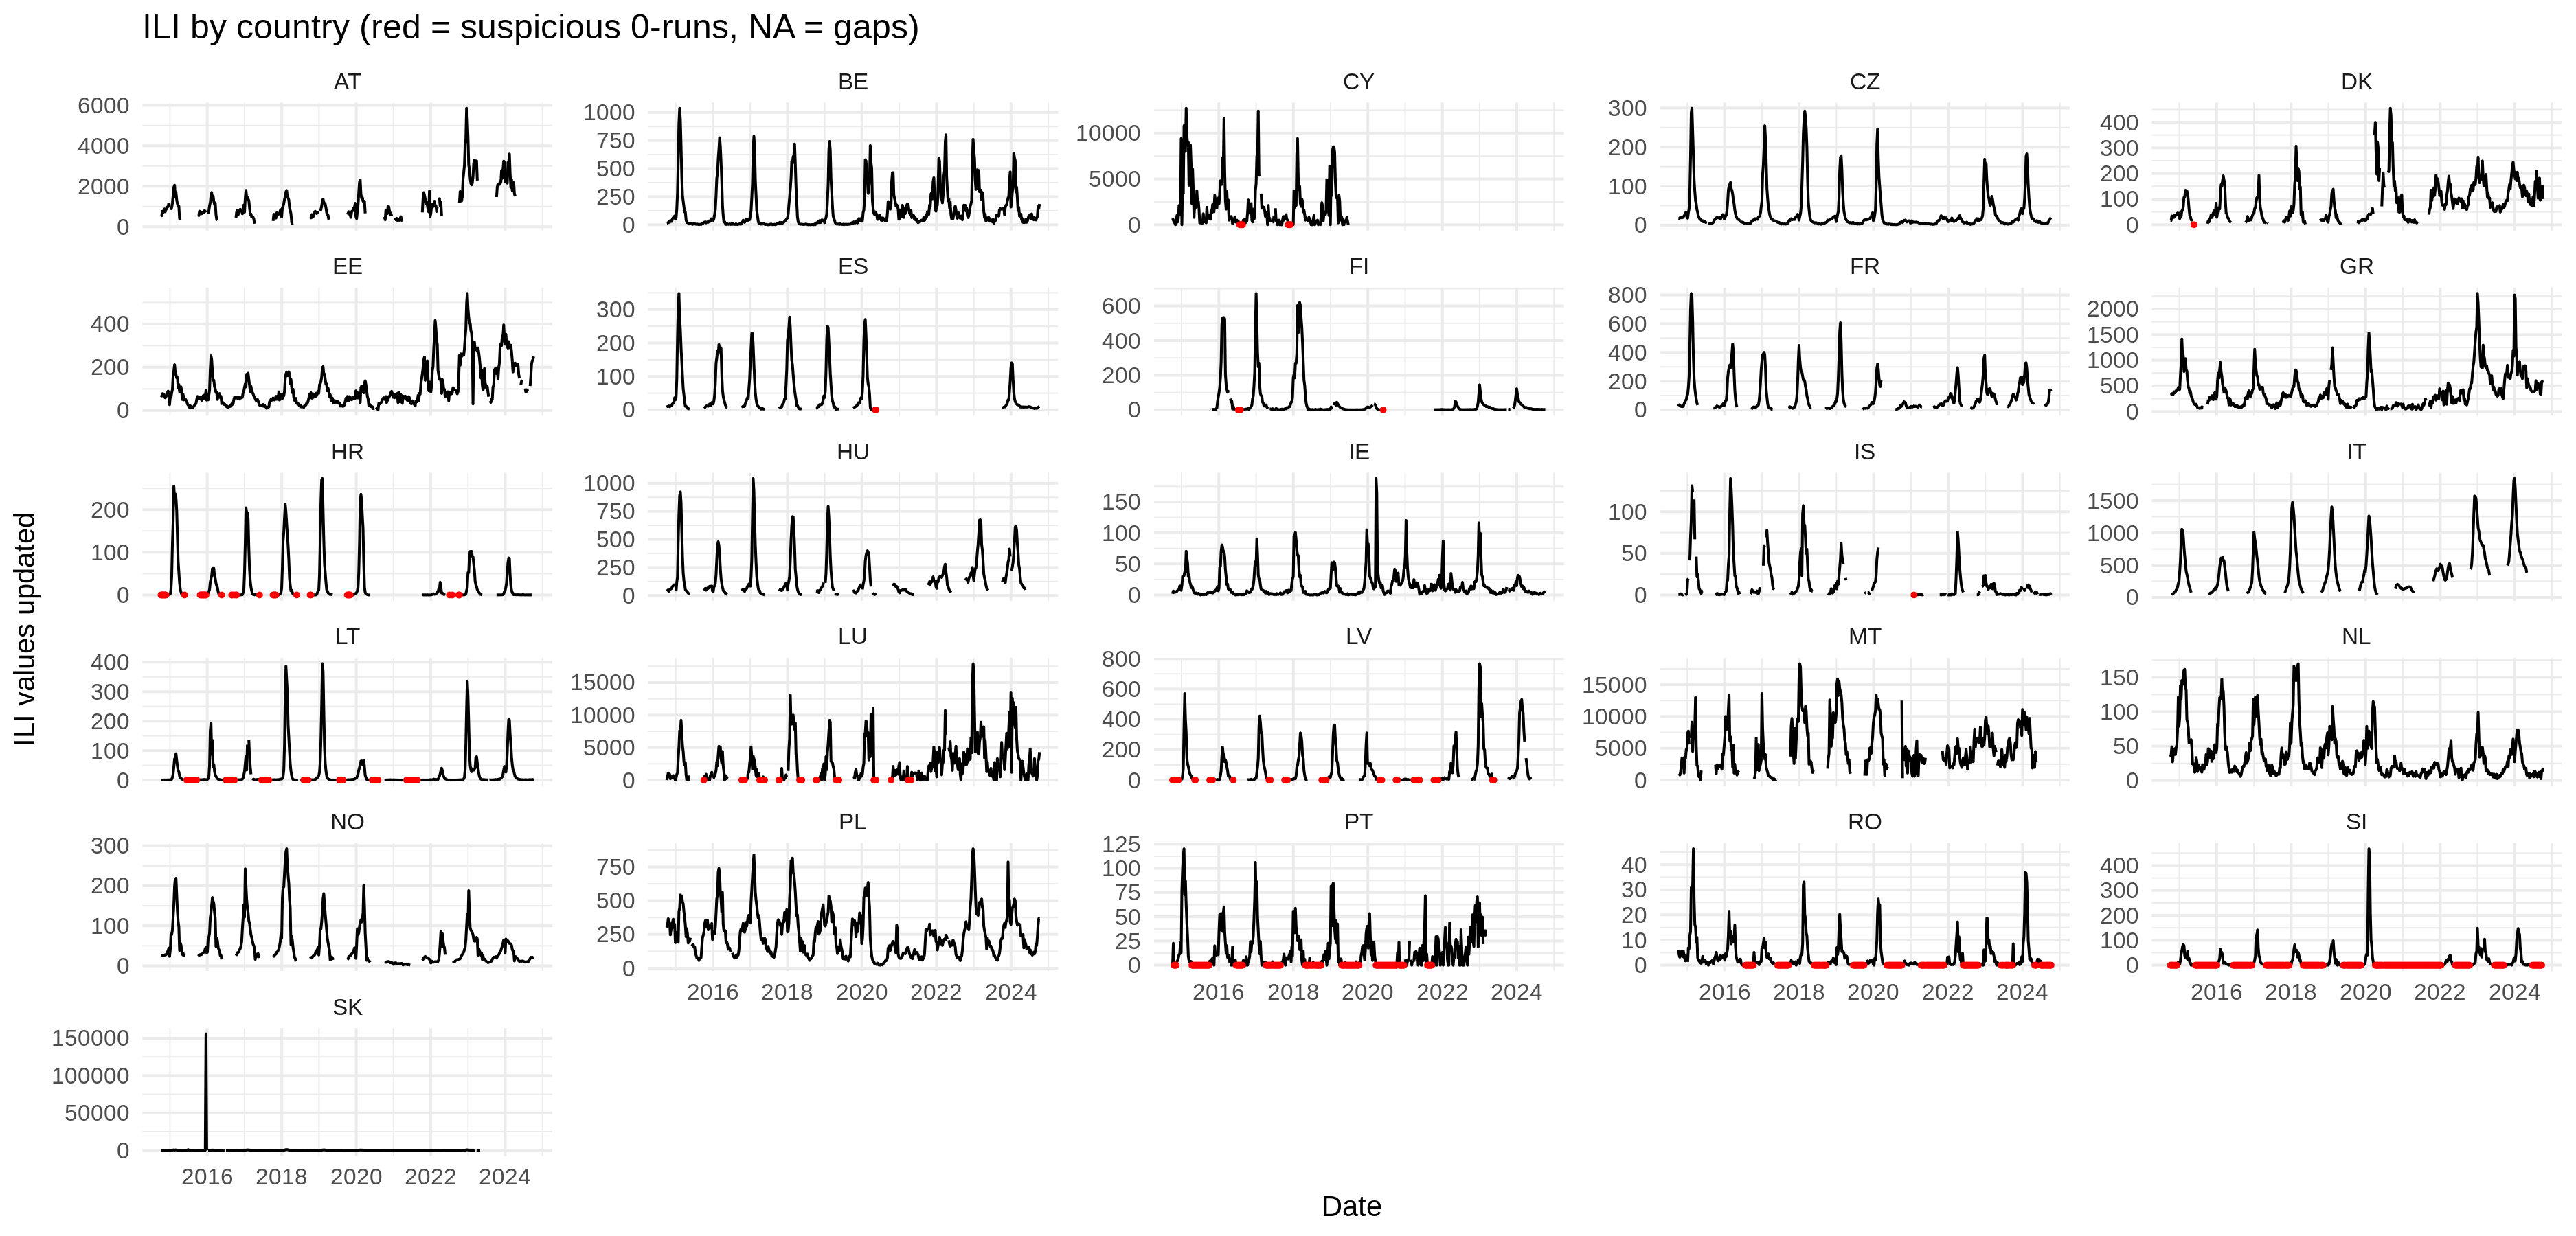

In [109]:
options(repr.plot.width = 25, repr.plot.height = 12, repr.plot.res = 150)

ggplot(ili_prep3, aes(x = date)) +
  geom_line(aes(y = value), colour = "black", na.rm = FALSE) +
  geom_point(data = subset(ili_prep3, sus), aes(y = value), colour = "red", size = 1) +
  facet_wrap(~ location, scales = "free_y",  ncol = 5) +
  labs(title = "ILI by country (red = suspicious 0-runs, NA = gaps)",
       x = "Date", y = "ILI values updated") +
  theme_minimal(base_size = 20)

### Deleting some countries : PT, SK, ES, CY and take  flu season starts from 2016 (basically when the SI starts) to 2024 -2025 season

In [110]:
fi_start <- ili_prep3 %>% filter(location == "FI", sus==FALSE) %>% summarise(fis = min(date, na.rm = TRUE)) %>%  pull(fis)
fi_start

[1] "2015-05-03"

In [111]:
# ili_data_filt1 <- ili_prep3 %>% filter(!location %in% c("PT", "SK", "NO", "ES", "CY"), date >= ymd("2022-09-30"))
city_excluded <- c("PT", "SK", "ES", "CY", "SI", "IT", "HR", "LV")

ili_data_filt1 <- ili_prep3 %>%
  mutate(date = as.Date(date)) %>%
  filter(
    !location %in% city_excluded,
    date >= fi_start,
    date < ymd("2019-10-01") | date > ymd("2022-09-30")
  )

## Cutting based on GAP

In [112]:
## based on the sus on the summer period, take the earliest and latest flagged sus time accross all countries
# 1) Use only `sus`
df1 <- ili_data_filt1 %>% mutate(iso_y = isoyear(date))

# 2) All suspicious runs (consecutive sus == TRUE) by country-year
all_runs <- df1 %>%
  arrange(location, iso_y, date) %>%
  group_by(location, iso_y) %>%
  mutate(run_id = cumsum(coalesce(sus != lag(sus), TRUE))) %>%
  group_by(location, iso_y, run_id) %>%
  summarise(
    sus   = first(sus),
    start = first(date),
    end   = last(date),
    .groups = "drop") %>%
  filter(sus)

# 3) Seasonal window filter + clipping
all_runs_season <- all_runs %>%
  mutate(
    win_start = ymd(paste0(iso_y, "-03-30")),
    win_end   = ymd(paste0(iso_y, "-11-30")),
    overlaps  = (end >= win_start) & (start <= win_end)
  ) %>%
  filter(overlaps) %>%
  mutate(
    start_clip = pmax(start, win_start),
    end_clip   = pmin(end,   win_end),
    start_w    = isoweek(start_clip),
    end_w      = isoweek(end_clip)
  )

# 4) Global consensus
global_consensus <- all_runs_season %>%
  summarise(
    start_w_consensus = min(start_w, na.rm = TRUE),
    end_w_consensus   = max(end_w,   na.rm = TRUE)
  )

# 5) Year-specific consensus
year_consensus <- all_runs_season %>%
  group_by(iso_y) %>%
  summarise(
    start_w_consensus = min(start_w, na.rm = TRUE),
    end_w_consensus   = max(end_w,   na.rm = TRUE),
    .groups = "drop"
  )

In [113]:
year_consensus <- df1 %>%
  mutate(
    win_start = ymd(paste0(iso_y, "-03-30")),
    win_end   = ymd(paste0(iso_y, "-11-30")),
    in_win    = date >= win_start & date <= win_end
  ) %>%
  filter(sus, in_win) %>%
  group_by(iso_y) %>%
  summarise(
    earliest_date = min(date, na.rm = TRUE),
    latest_date   = max(date, na.rm = TRUE),
    earliest_week = isoweek(earliest_date),
    latest_week   = isoweek(latest_date),
    .groups = "drop"
  )

year_consensus

iso_y earliest_date latest_date earliest_week latest_week
1 2015  2015-05-03    2015-10-04  18            40         
2 2016  2016-04-17    2016-11-06  15            44         
3 2017  2017-04-02    2017-10-15  13            41         
4 2018  2018-04-22    2018-10-14  16            41         
5 2019  2019-04-14    2019-09-29  15            39         
6 2022  2022-10-02    2022-10-23  39            42         
7 2023  2023-04-09    2023-10-01  14            39         
8 2024  2024-04-14    2024-10-06  15            40

In [114]:
# you already have `year_consensus` with earliest_week / latest_week
global_consensus <- year_consensus %>%
  summarise(
    earliest_week = min(earliest_week, na.rm = TRUE),
    latest_week   = max(latest_week,   na.rm = TRUE)
  )

global_consensus

earliest_week latest_week
1 13            44

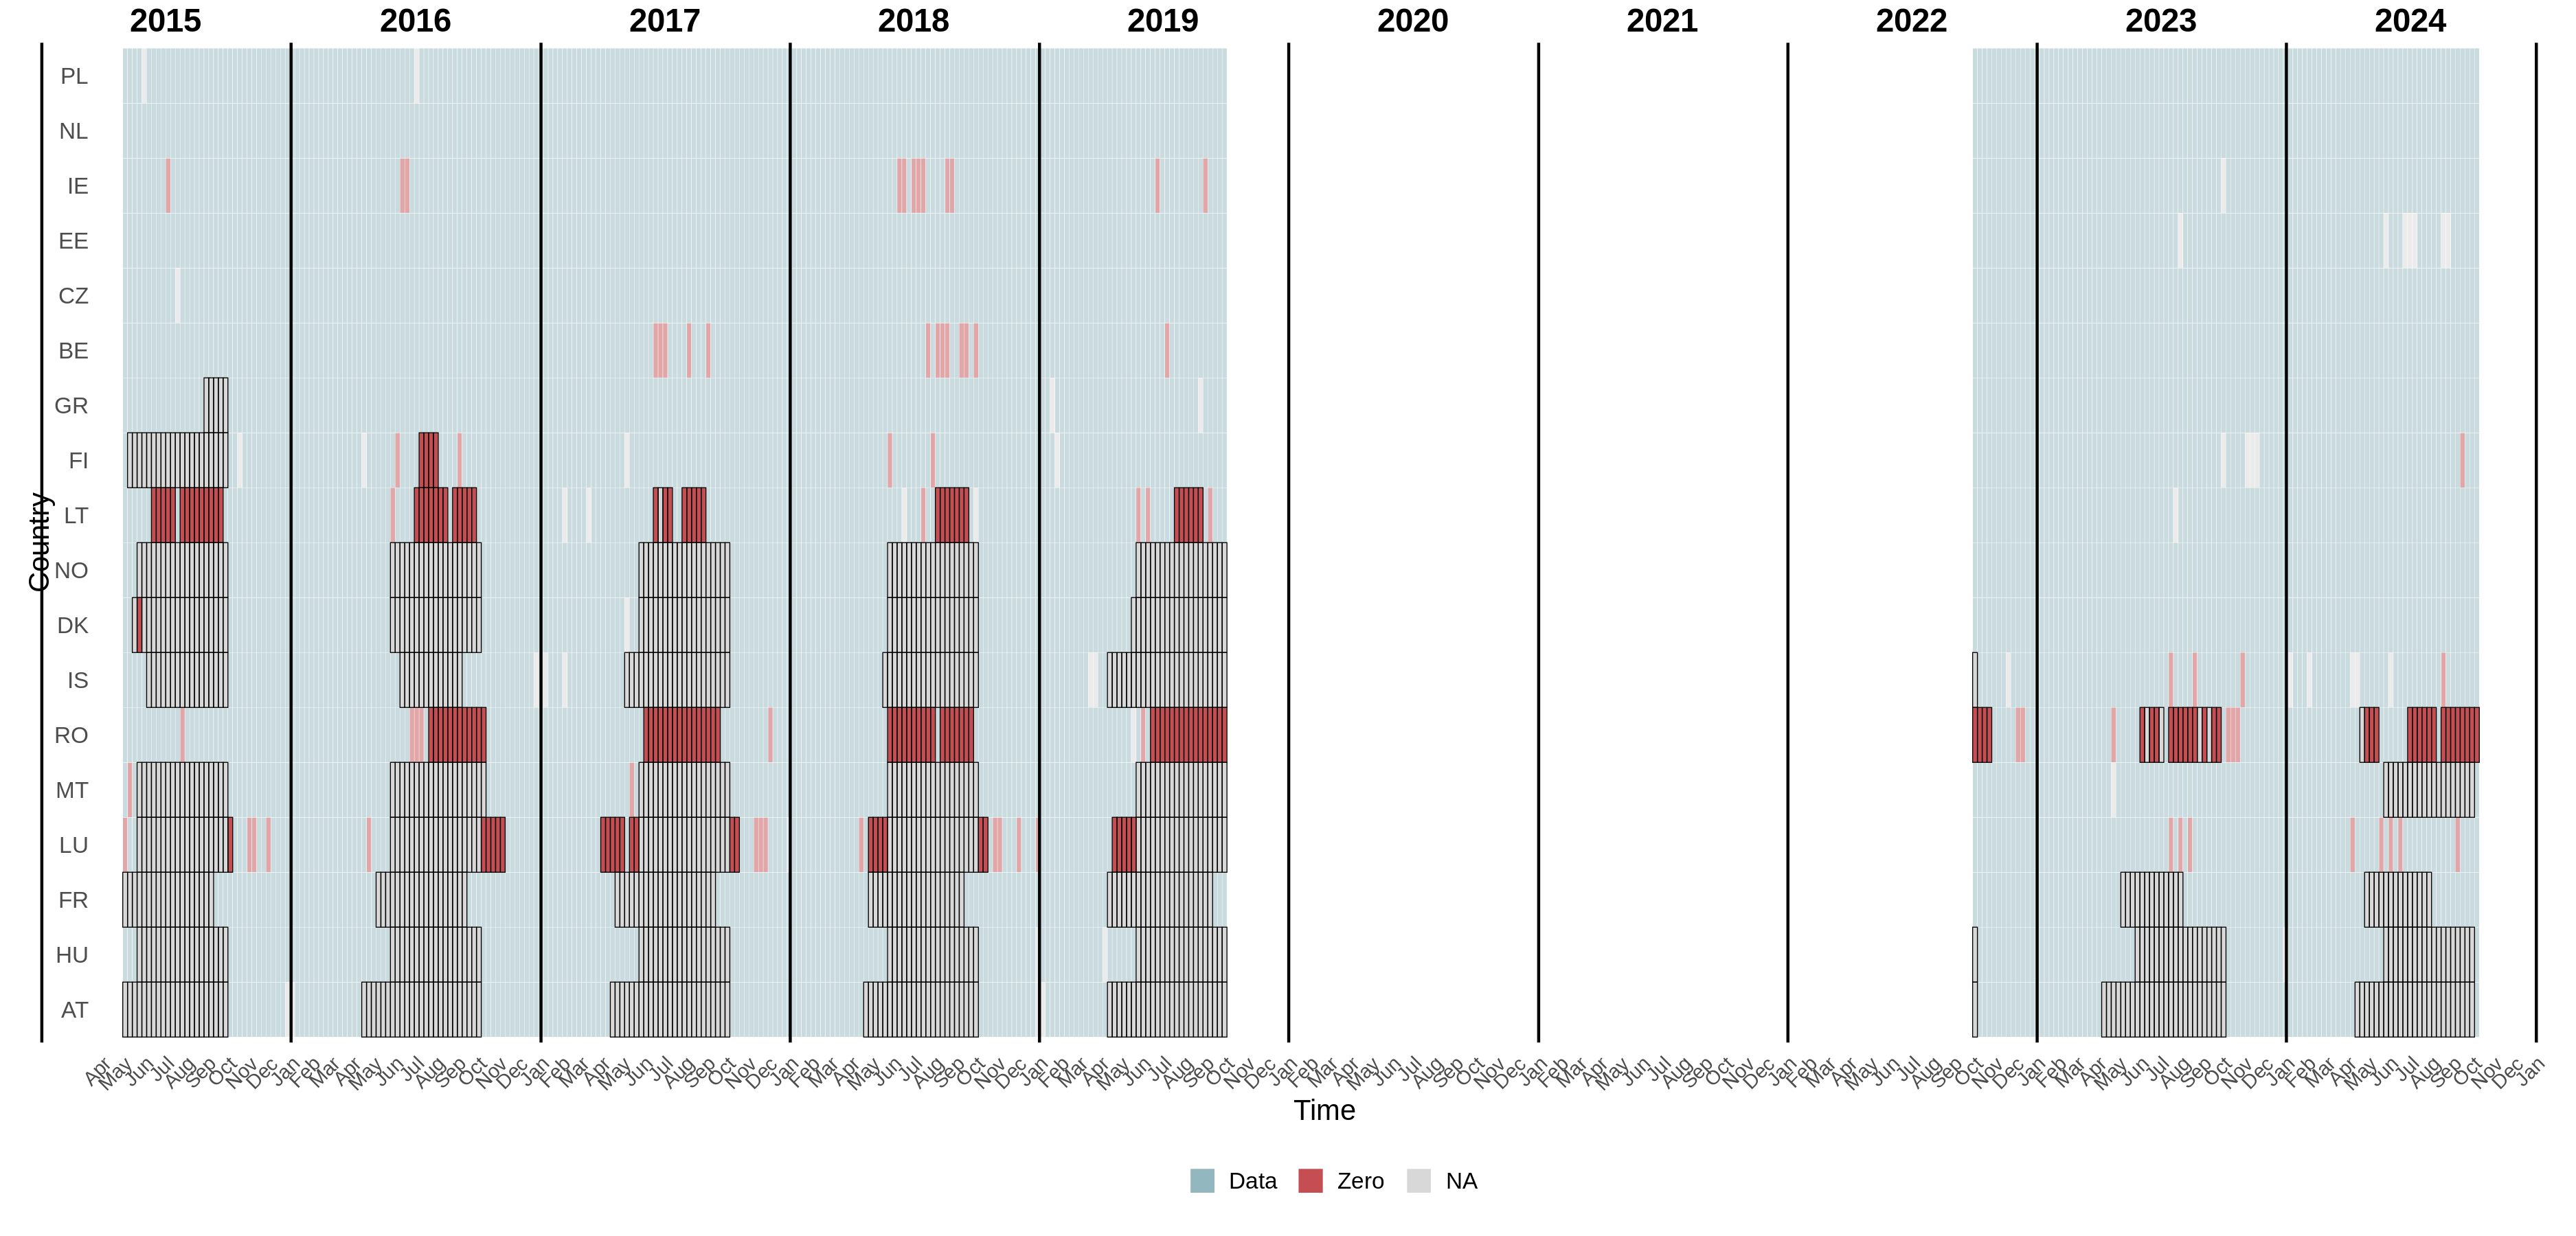

In [115]:
# Categorize data as "ZERO", "NA", and "DATA", highlight only the sus
plot_df <- ili_data_filt1 %>%
  mutate(state = case_when(
      is.na(value)  ~ "NA",
      value == 0  ~ "ZERO",
      TRUE ~ "DATA"),
    highlight = sus & state != "DATA"
  )

marked_df <- plot_df # to be saved later

# Order the display of the time-series based on the amount of sus
plot_df <- plot_df %>%
  group_by(location) %>%
  mutate(perc_highlight = mean(highlight, na.rm = TRUE)) %>%
  ungroup() %>%
  mutate(location = fct_reorder(location, perc_highlight, .desc = TRUE))

# Take the year
xmin <- min(plot_df$date, na.rm = TRUE)
xmax <- max(plot_df$date, na.rm = TRUE)
year_lines <- seq(floor_date(xmin, "year"), ceiling_date(xmax, "year"), by = "1 year")

options(repr.plot.width = 25, repr.plot.height = 12, repr.plot.res = 150)

# 4) Plot
ggplot(plot_df, aes(date, location)) +
  geom_tile(aes(fill = state, alpha = ifelse(highlight, "high", "low")), color = "white", linewidth = 0.1) +
  scale_fill_manual(
    values = c("DATA" = "#93B7BE", "ZERO" = "#C44E52", "NA" = "#D8D8D8"),
    breaks = c("DATA","ZERO","NA"), labels = c("Data","Zero","NA"), drop = FALSE  ) +
  scale_alpha_manual(values = c(low = 0.5, high = 1), guide = "none") +
  scale_x_date(date_breaks = "1 month", date_labels = "%b",
               expand = expansion(mult = c(0.01, 0.03))) +
  geom_vline(xintercept = year_lines, color = "black", linewidth = 1) +
  annotate("text",
           x = year_lines + months(6), y = Inf, vjust = -0.5,
           label = year(year_lines), fontface = "bold", size = 8) +
  labs(x = "Time", y = "Country", fill = "") +
  theme_minimal(base_size = 20) +
  theme(
    panel.grid = element_blank(),
    axis.text.x = element_text(angle = 45, hjust = 1, size = 14),
    axis.text.y = element_text(size = 16),
    legend.position = "bottom",
    plot.margin = margin(t = 30, r = 20, b = 20, l = 20)
  ) +
  geom_tile(data = subset(plot_df, highlight), aes(date, location), fill = NA, color = "black", linewidth = 0.3) +
  coord_cartesian(xlim = range(plot_df$date, na.rm = TRUE), clip = "off")


In [116]:
w_start <- global_consensus$earliest_week[[1]]
w_end   <- global_consensus$latest_week[[1]]

yrs <- seq(2015, 2024)

cut_lines <- tibble(
  yr    = yrs,
  start = ISOweek2date(sprintf("%d-W%02d-1", yr, w_start)),
  end   = ISOweek2date(sprintf("%d-W%02d-7", yr, w_end))
) %>%
  pivot_longer(c(start, end), names_to = "which", values_to = "x")


In [117]:
cut_lines

yr   which x         
1  2015 start 2015-03-23
2  2015 end   2015-11-01
3  2016 start 2016-03-28
4  2016 end   2016-11-06
5  2017 start 2017-03-27
6  2017 end   2017-11-05
7  2018 start 2018-03-26
8  2018 end   2018-11-04
9  2019 start 2019-03-25
10 2019 end   2019-11-03
11 2020 start 2020-03-23
12 2020 end   2020-11-01
13 2021 start 2021-03-29
14 2021 end   2021-11-07
15 2022 start 2022-03-28
16 2022 end   2022-11-06
17 2023 start 2023-03-27
18 2023 end   2023-11-05
19 2024 start 2024-03-25
20 2024 end   2024-11-03

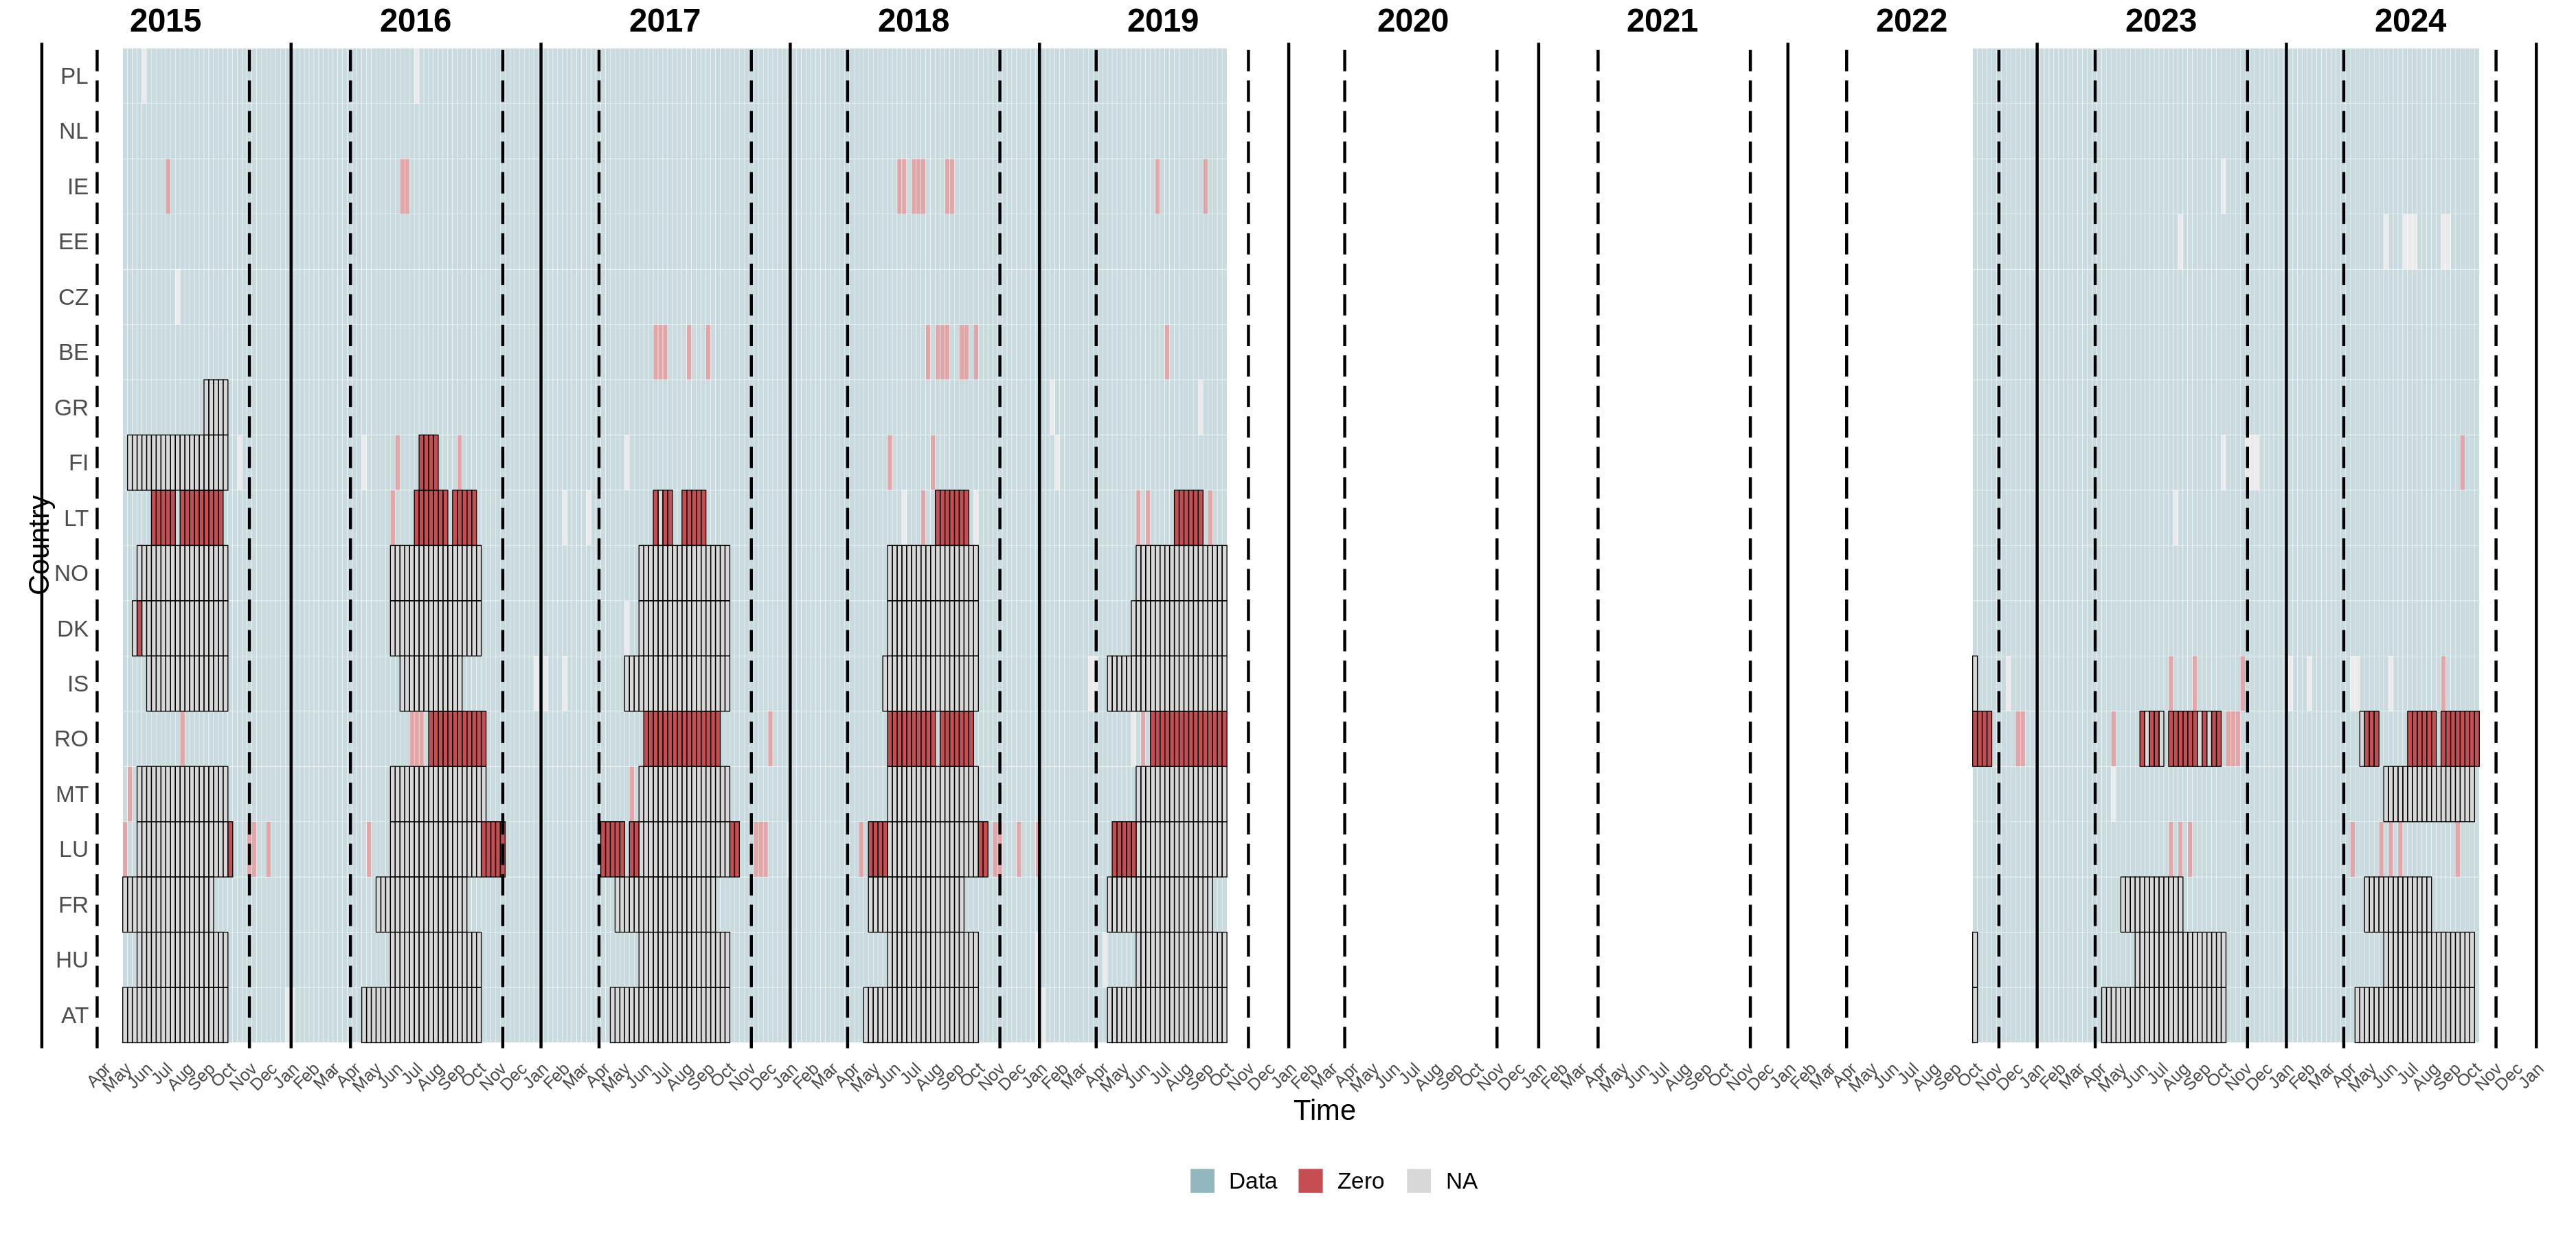

In [118]:
# Categorize data as "ZERO", "NA", and "DATA", highlight only the sus
plot_df <- ili_data_filt1 %>%
  mutate(state = case_when(
      is.na(value)  ~ "NA",
      value == 0  ~ "ZERO",
      TRUE ~ "DATA"),
    highlight = sus & state != "DATA"
  )


# Order the display of the time-series based on the amount of sus
plot_df <- plot_df %>%
  group_by(location) %>%
  mutate(perc_highlight = mean(highlight, na.rm = TRUE)) %>%
  ungroup() %>%
  mutate(location = fct_reorder(location, perc_highlight, .desc = TRUE))

# Take the year
xmin <- min(plot_df$date, na.rm = TRUE)
xmax <- max(plot_df$date, na.rm = TRUE)
year_lines <- seq(floor_date(xmin, "year"), ceiling_date(xmax, "year"), by = "1 year")

options(repr.plot.width = 25, repr.plot.height = 12, repr.plot.res = 150)
# 4) Plot
ggplot(plot_df, aes(date, location)) +
  geom_tile(aes(fill = state, alpha = ifelse(highlight, "high", "low")), color = "white", linewidth = 0.1) +
  scale_fill_manual(
    values = c("DATA" = "#93B7BE", "ZERO" = "#C44E52", "NA" = "#D8D8D8"),
    breaks = c("DATA","ZERO","NA"), labels = c("Data","Zero","NA"), drop = FALSE  ) +
  scale_alpha_manual(values = c(low = 0.5, high = 1), guide = "none") +
  scale_x_date(date_breaks = "1 month", date_labels = "%b",
               expand = expansion(mult = c(0.01, 0.03))) +
  geom_vline(xintercept = year_lines, color = "black", linewidth = 1) +
  geom_vline(data = cut_lines, aes(xintercept = x),
           linetype = "longdash", linewidth = 1, color = "black") +

  annotate("text",
           x = year_lines + months(6), y = Inf, vjust = -0.5,
           label = year(year_lines), fontface = "bold", size = 8) +
  labs(x = "Time", y = "Country", fill = "") +
  theme_minimal(base_size = 20) +
  theme(
    panel.grid = element_blank(),
    axis.text.x = element_text(angle = 45, hjust = 1, size = 12),
    axis.text.y = element_text(size = 16),
    legend.position = "bottom",
    plot.margin = margin(t = 30, r = 20, b = 20, l = 20)
  ) +

  geom_tile(data = subset(plot_df, highlight), aes(date, location), fill = NA, color = "black", linewidth = 0.3) +
  coord_cartesian(xlim = range(plot_df$date, na.rm = TRUE), clip = "off")


In [119]:
ili_data_filt1 <- ili_data_filt1 %>%
  mutate(iso_w = isoweek(date), summer_cut = between(iso_w, w_start, w_end))

Warning message:
“Removed 22 rows containing missing values or values outside the scale range
(`geom_line()`).”


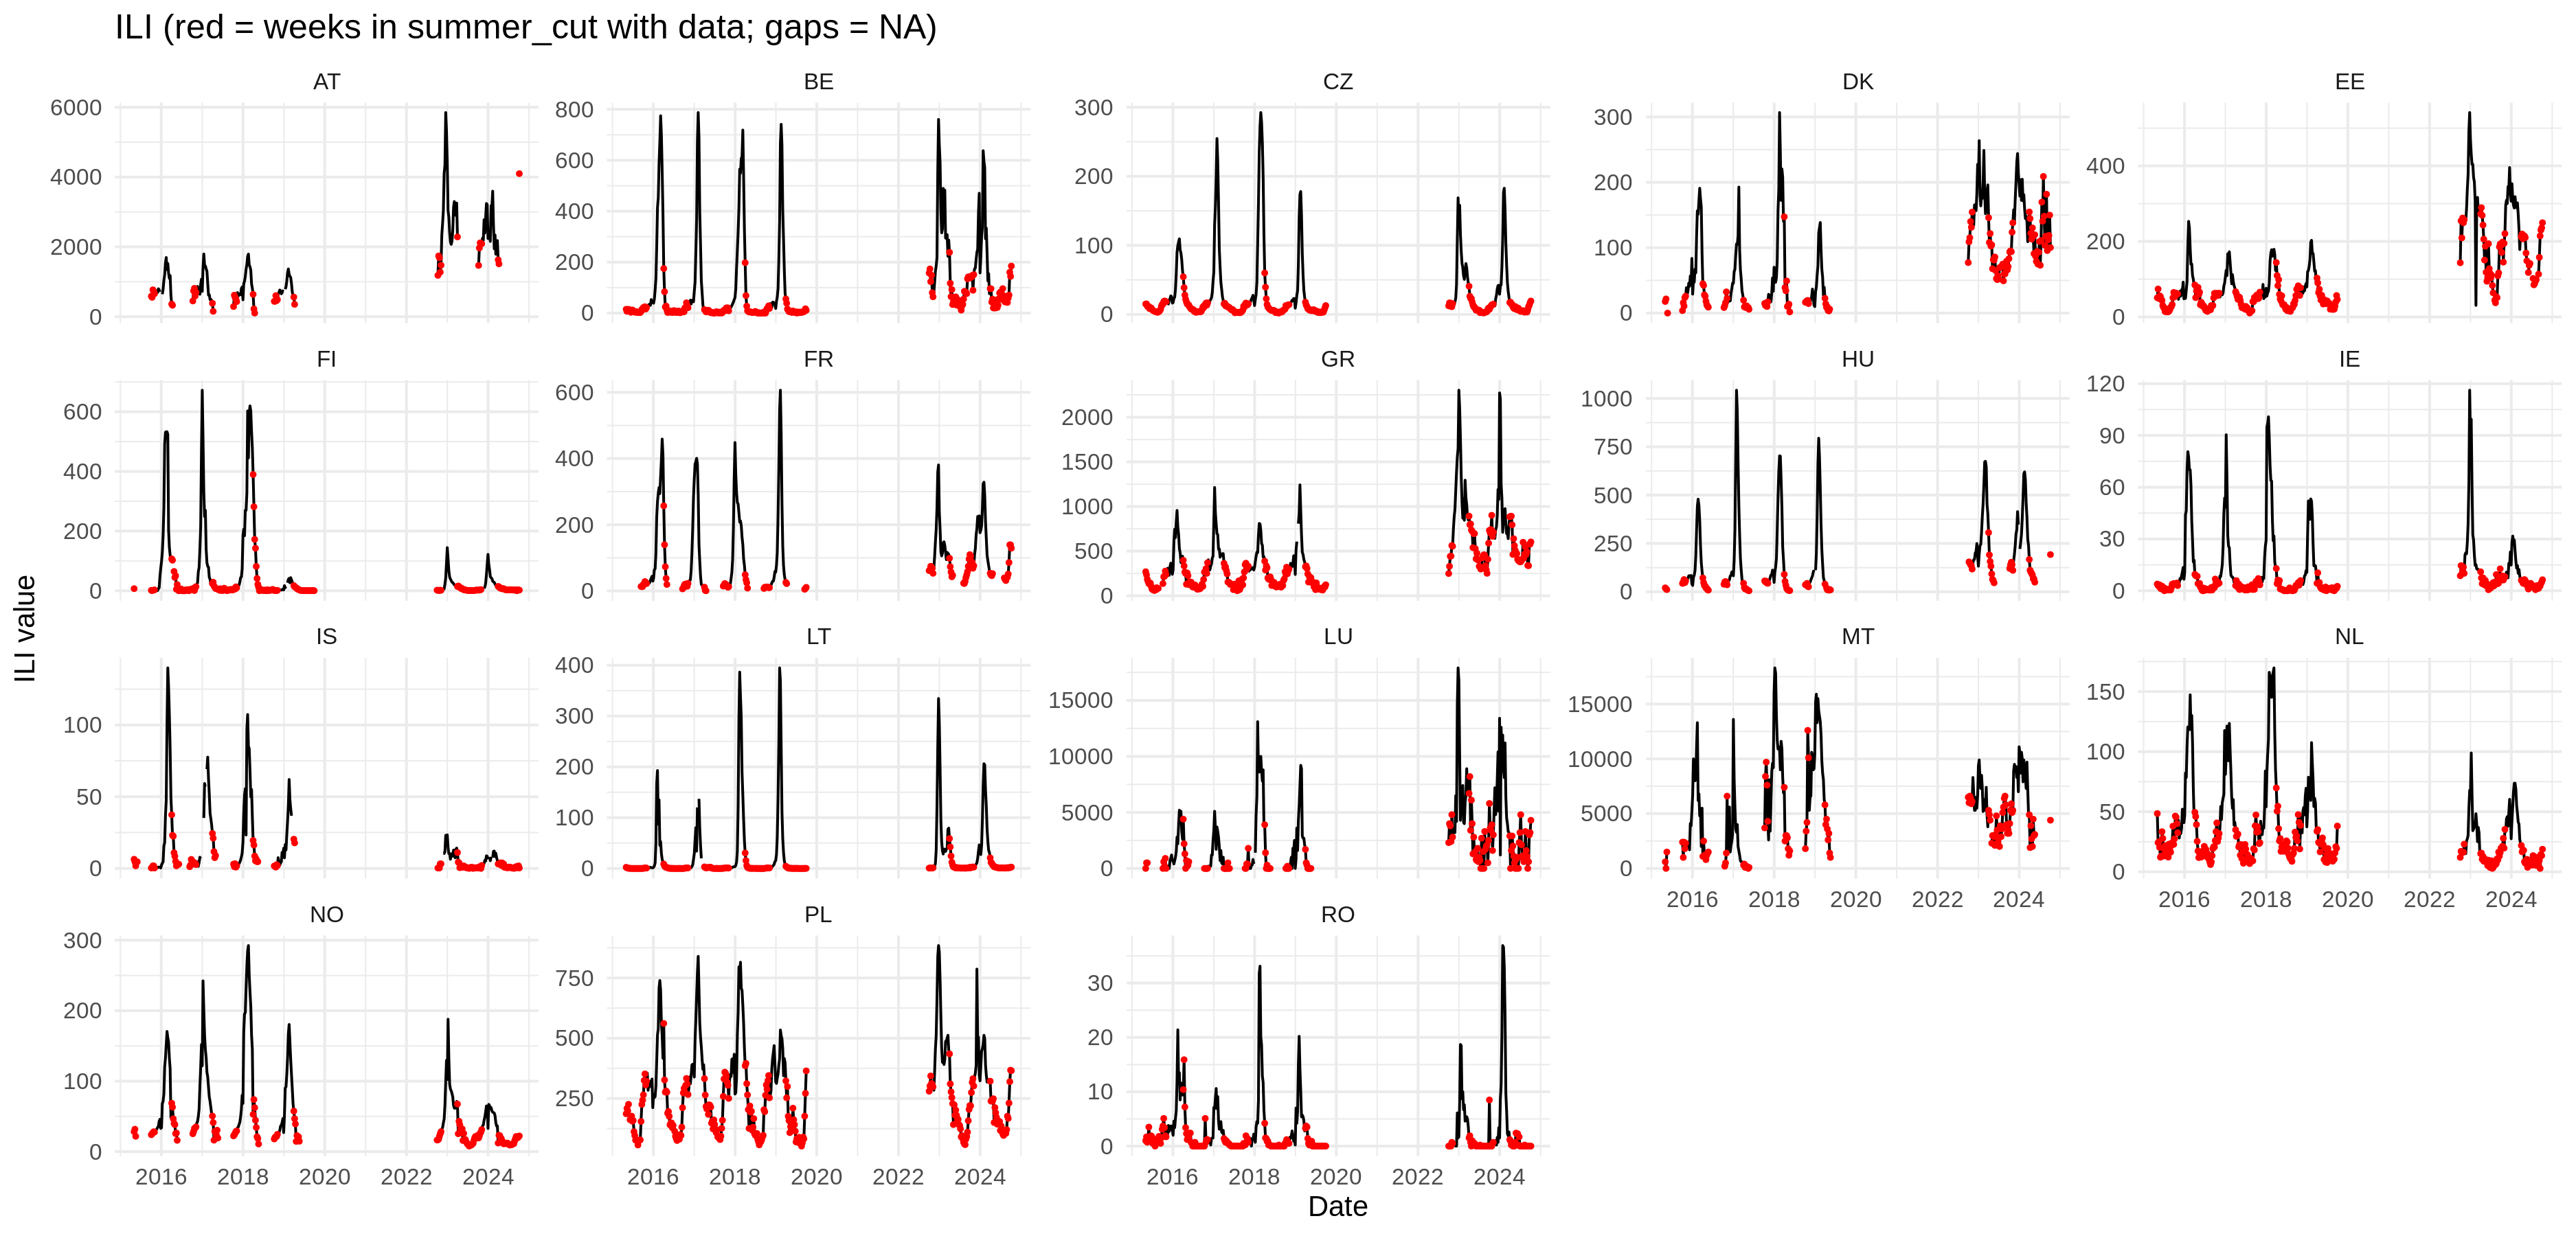

In [29]:
plot_df <- ili_data_filt1 %>%
  arrange(location, date) %>%
  group_by(location) %>%
  complete(date = seq(min(date, na.rm = TRUE), max(date, na.rm = TRUE), by = "1 week")) %>%
  mutate(
    # new rows created by complete() get NAs; keep them
    summer_cut = tidyr::replace_na(summer_cut, FALSE)
  ) %>%
  ungroup()

options(repr.plot.width = 25, repr.plot.height = 12, repr.plot.res = 150)

ggplot(plot_df, aes(x = date)) +
  geom_line(aes(y = value), colour = "black", na.rm = FALSE) +  # breaks at NA
  geom_point(
    data = dplyr::filter(plot_df, summer_cut, !is.na(value)),
    aes(y = value),
    colour = "red", size = 1
  ) +
  facet_wrap(~ location, scales = "free_y") +
  labs(
    title = "ILI (red = weeks in summer_cut with data; gaps = NA)",
    x = "Date", y = "ILI value"
  ) +
  theme_minimal(base_size = 20)

In [30]:
# options(repr.plot.width = 25, repr.plot.height = 12, repr.plot.res = 150)
# ggplot(ili_data_filt1, aes(x = date)) +
#   geom_line(aes(y = value), colour = "black", na.rm = FALSE) +

#   geom_point(data = ili_data_filt1 %>% filter(summer_cut, !is.na(value)), aes(y = value),  colour = "red", size = 1) +
#   facet_wrap(~ location, scales = "free_y") +

#   labs(
#     title = "ILI (red = weeks in summer_cut with data; gaps = NA)",
#     x = "Date", y = "ILI value") +

#   theme_minimal(base_size = 20)


In [31]:
# Cut the summer period
keep <- ili_data_filt1 %>%
  filter(!summer_cut) %>%
  arrange(location, date) %>%
  group_by(location) %>%
  mutate(t_idx = row_number(),  year  = year(date)) %>%
  ungroup()

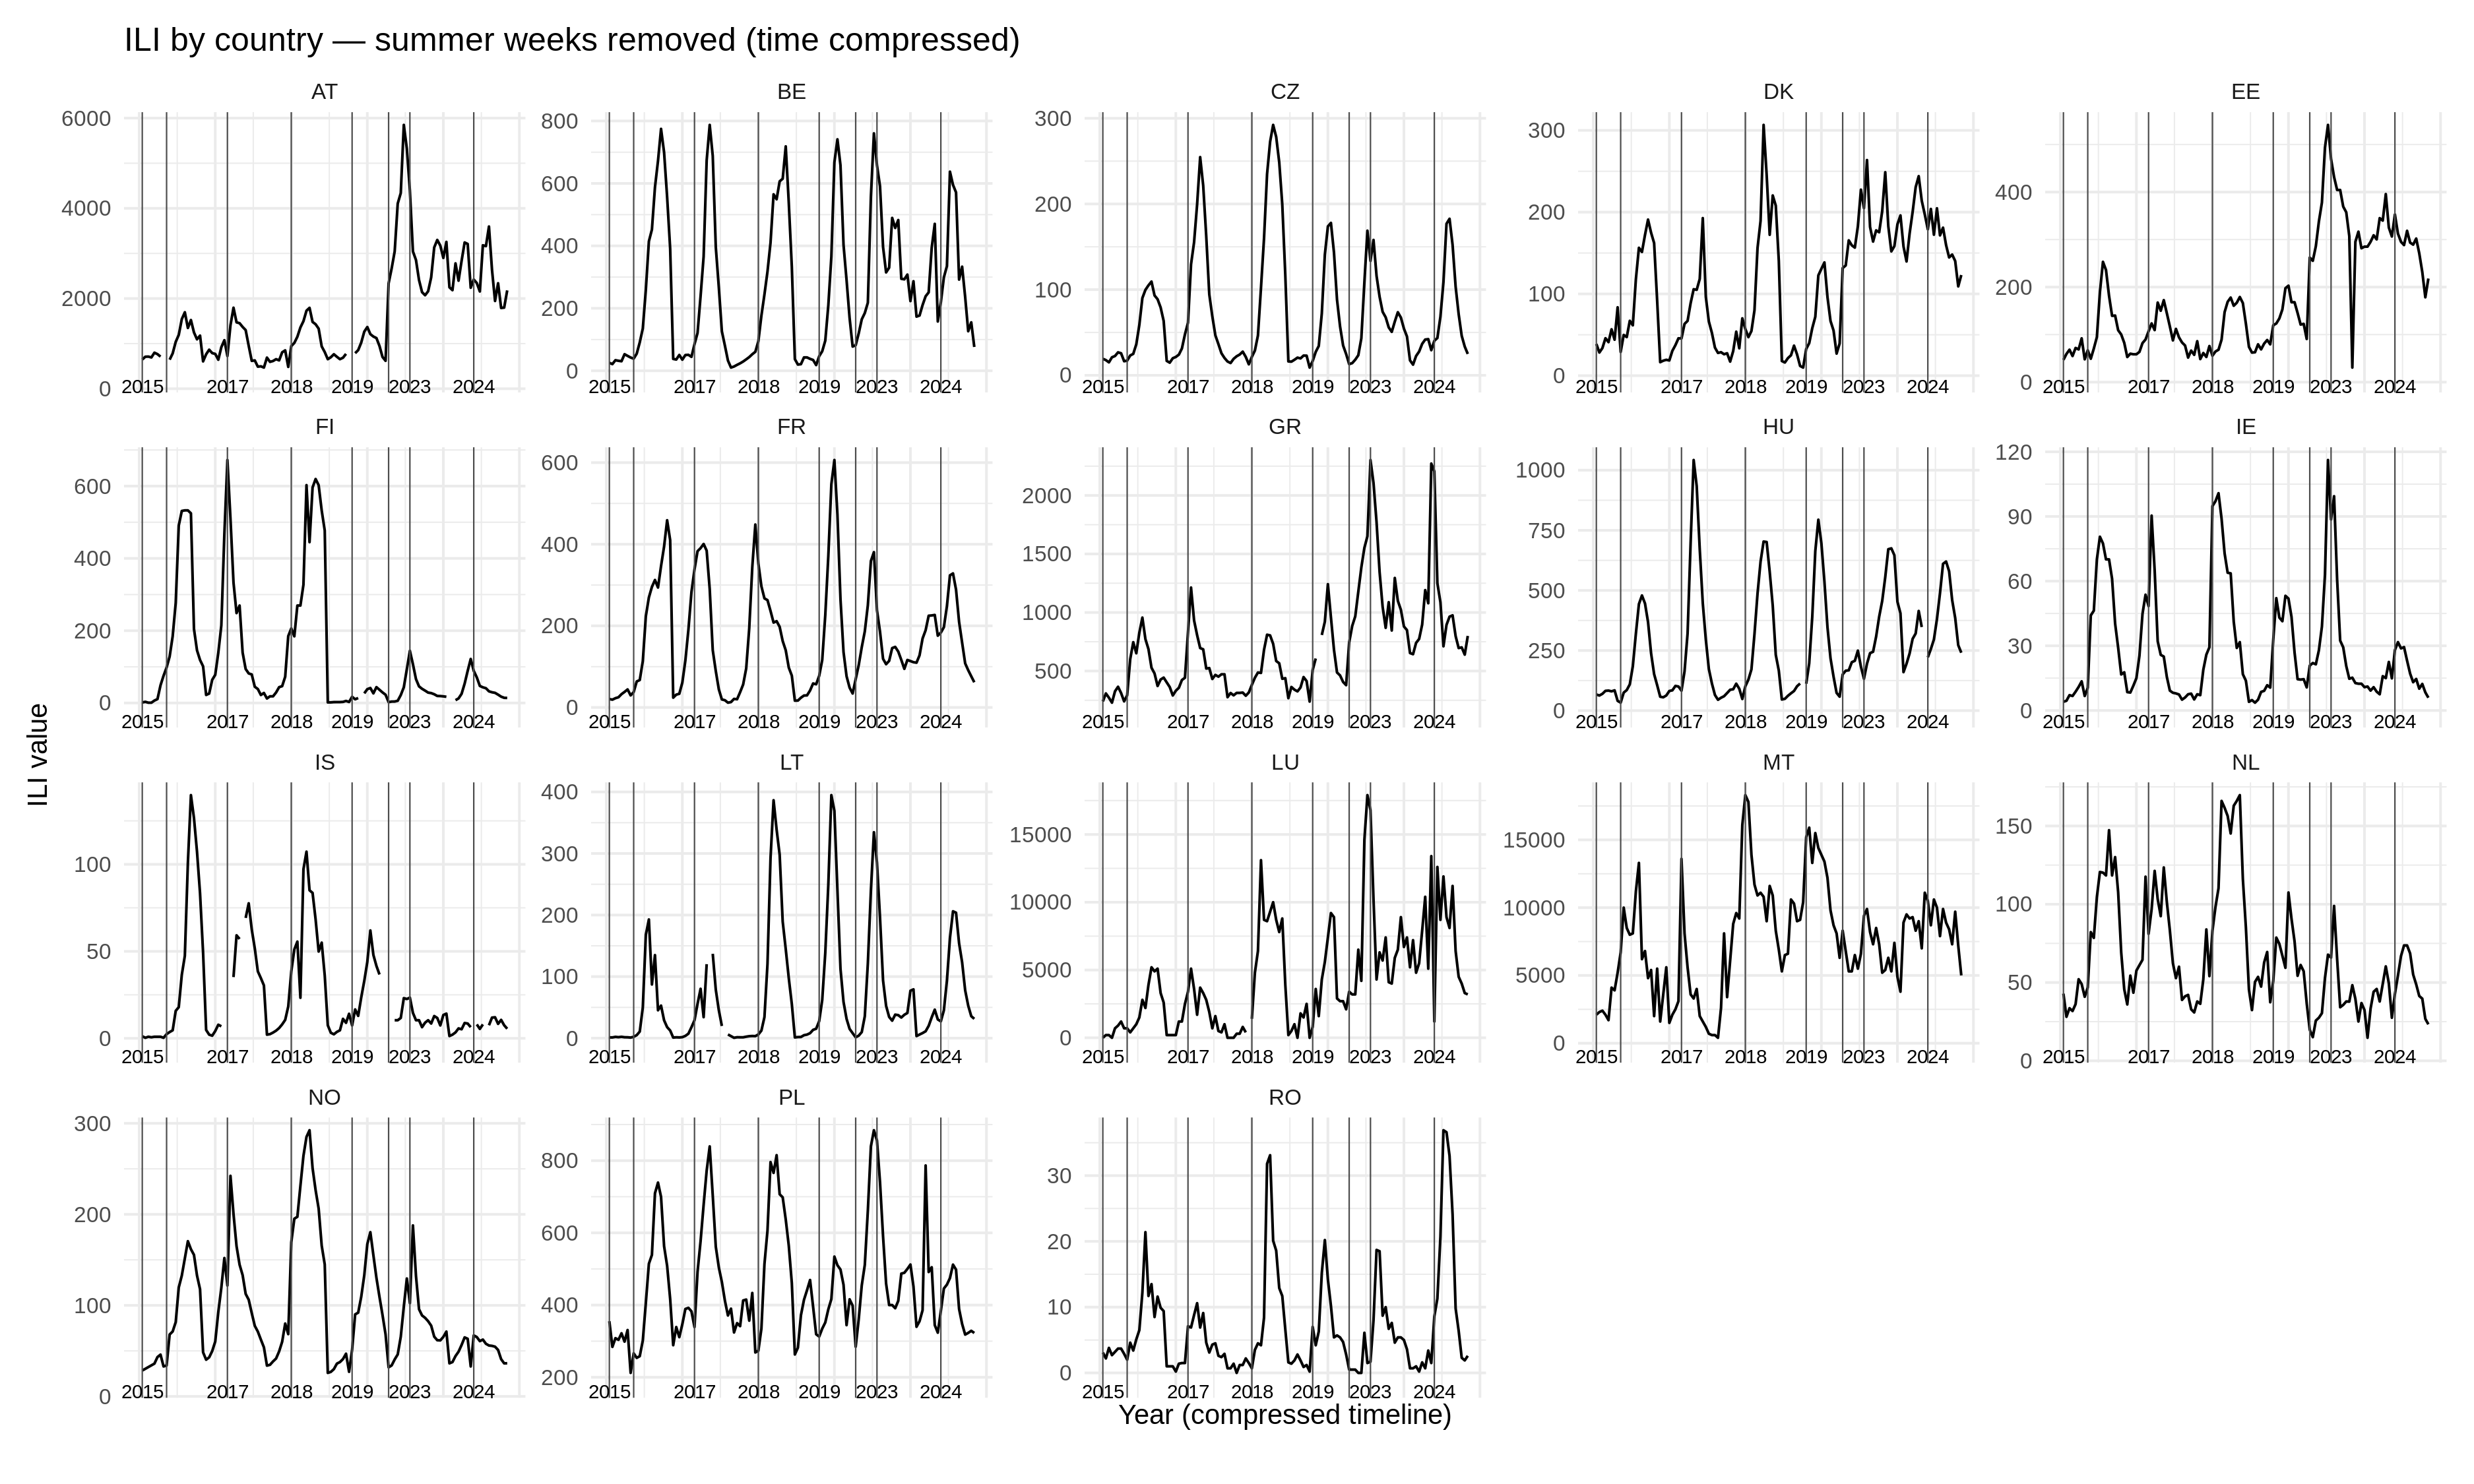

In [32]:
year_ticks <- keep %>%
  arrange(location, t_idx) %>%
  group_by(location, yr = year(date)) %>%
  summarise(x = first(t_idx), .groups = "drop")

yrange <- keep %>%
  group_by(location) %>%
  summarise(
    ymin = min(value, na.rm = TRUE),
    ymax = max(value, na.rm = TRUE),
    .groups = "drop"
  ) %>%
  mutate(ypos = ymin - 0.05 * pmax(1e-6, ymax - ymin))

year_ticks <- year_ticks %>% left_join(yrange, by = "location")

options(repr.plot.width = 25, repr.plot.height = 15, repr.plot.res = 150)
ggplot(keep, aes(x = t_idx, y = value)) +
  geom_line(color = "black", na.rm = FALSE) +
  geom_vline(data = year_ticks, aes(xintercept = x), color = "grey30", linewidth = 0.5) +
  geom_text(data = year_ticks,
            aes(x = x, y = ypos, label = yr),
            inherit.aes = FALSE, size = 5, vjust = 1 , check_overlap = TRUE) +
  facet_wrap(~ location, scales = "free_y", ncol=5) +
  labs(title = "ILI by country — summer weeks removed (time compressed)",
       x = "Year (compressed timeline)", y = "ILI value") +
  theme_minimal(base_size = 20) +
  theme(axis.text.x = element_blank(),
        axis.ticks.x = element_blank(),
        plot.margin = margin(t = 20, r = 20, b = 40, l = 20)) +
  coord_cartesian(clip = "off")

In [33]:
# # Interpolate
# ts_clean <- keep %>%
#   arrange(location, date) %>%
#   group_by(location) %>%
#   mutate(
#     sus = ifelse(is.na(sus), FALSE, sus),
#     value_masked = ifelse(is.na(value) | (value == 0 & sus), NA_real_, value),
#     # linear interpolation
#     value_clean = na.approx(value_masked, x = as.numeric(date), na.rm = FALSE)
#   ) %>%
#   ungroup() %>%
#   select(-value_masked)

In [34]:
ts_clean <- keep %>%
  arrange(location, date) %>%
  group_by(location) %>%
  mutate(
    sus = coalesce(sus, FALSE),
    value_masked = ifelse(is.na(value) | (value == 0 & sus), NA_real_, value),

    # 1) linear interpolation for internal gaps (no extrapolation)
    value_lin = na.approx(
      value_masked,
      x      = as.numeric(date),
      na.rm  = FALSE,
    ),

    # 2) extrapolation: carry-forward only (fills trailing NAs; leaves leading NAs)
    value_clean = zoo::na.locf(value_lin, na.rm = FALSE)
  ) %>%
  ungroup() %>%
  select(-value_masked, -value_lin)


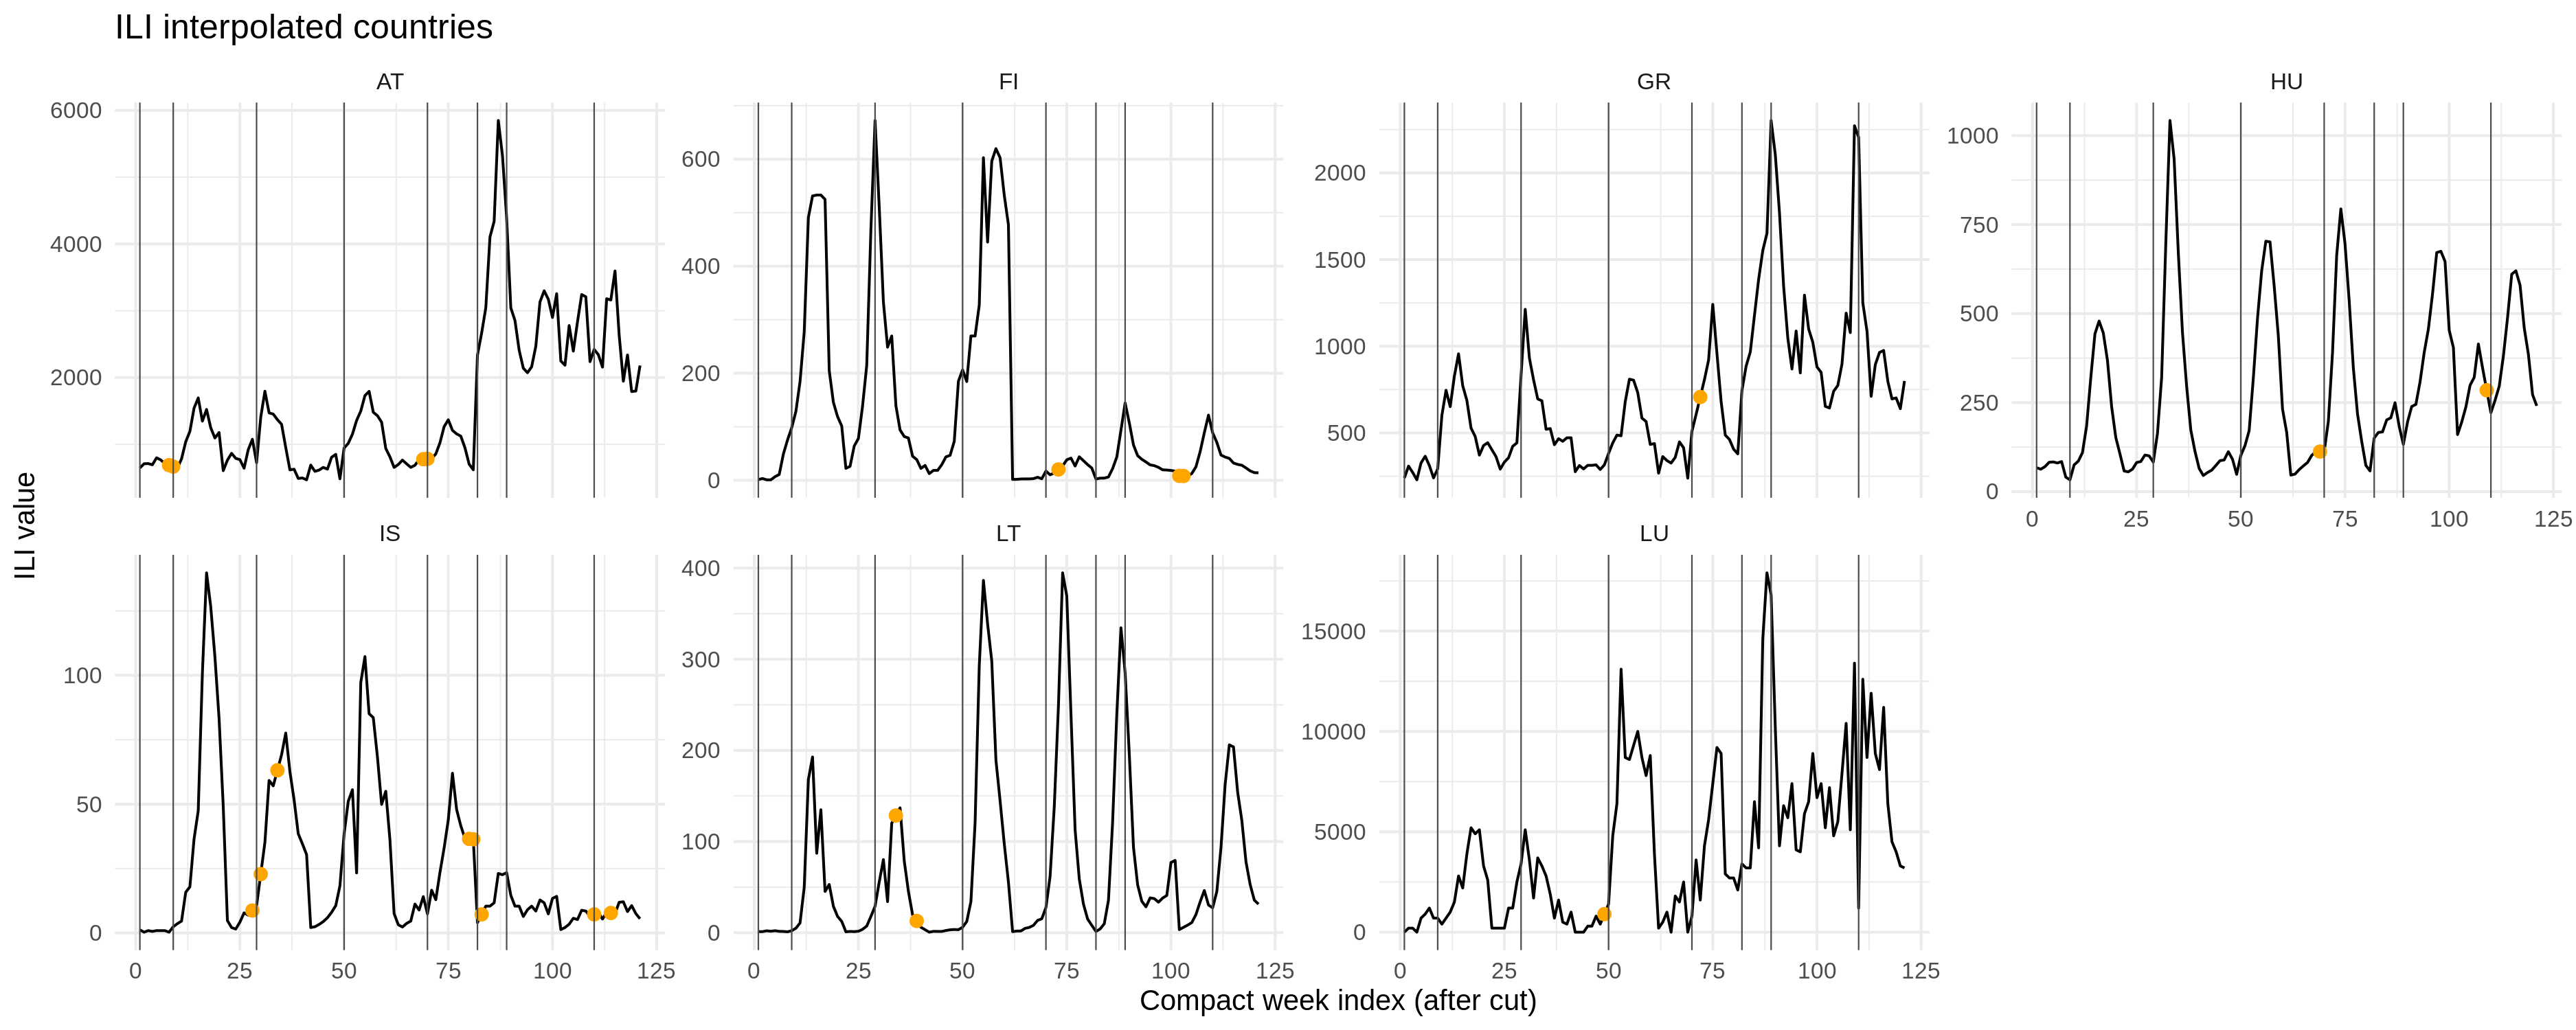

In [35]:
need_interp <- ts_clean %>%
  mutate(interp_flag = !is.na(value_clean) & (is.na(value) | (value == 0 & sus))) %>%
  group_by(location) %>%
  summarise(has_interp = any(interp_flag, na.rm = TRUE), .groups = "drop") %>%
  filter(has_interp) %>%
  pull(location)


# 2) filter data and prep plotting bits
ts_plot_f <- ts_clean %>%
  filter(location %in% need_interp) %>%
  mutate(
    interp_flag = !is.na(value_clean) & (is.na(value) | (value == 0 & sus)),
    year = year(date)
  )

year_lines_f <- ts_plot_f %>%
  group_by(location, year) %>%
  summarise(xintercept = first(t_idx), .groups = "drop")

# 3) plot
options(repr.plot.width = 25, repr.plot.height = 10, repr.plot.res = 150)
ggplot(ts_plot_f, aes(x = t_idx, y = value_clean)) +
  geom_line(color = "black", na.rm = FALSE) +

  geom_point(data = filter(ts_plot_f, interp_flag),
              aes(y = value_clean), color = "orange", size = 3.5) +


  geom_vline(data = year_lines_f,
              aes(xintercept = xintercept),
              linetype = "solid", linewidth = 0.5, color = "grey30") +
  facet_wrap(~ location, scales = "free_y", ncol=4) +
  labs(
    title = "ILI interpolated countries",
    x = "Compact week index (after cut)",
    y = "ILI value"
  ) +
  theme_minimal(base_size = 20)+
  theme(
    panel.background = element_rect(fill = "white", color = NA),  # grey panel
    plot.background  = element_rect(fill = "white", color = NA),  # grey around panels
  )



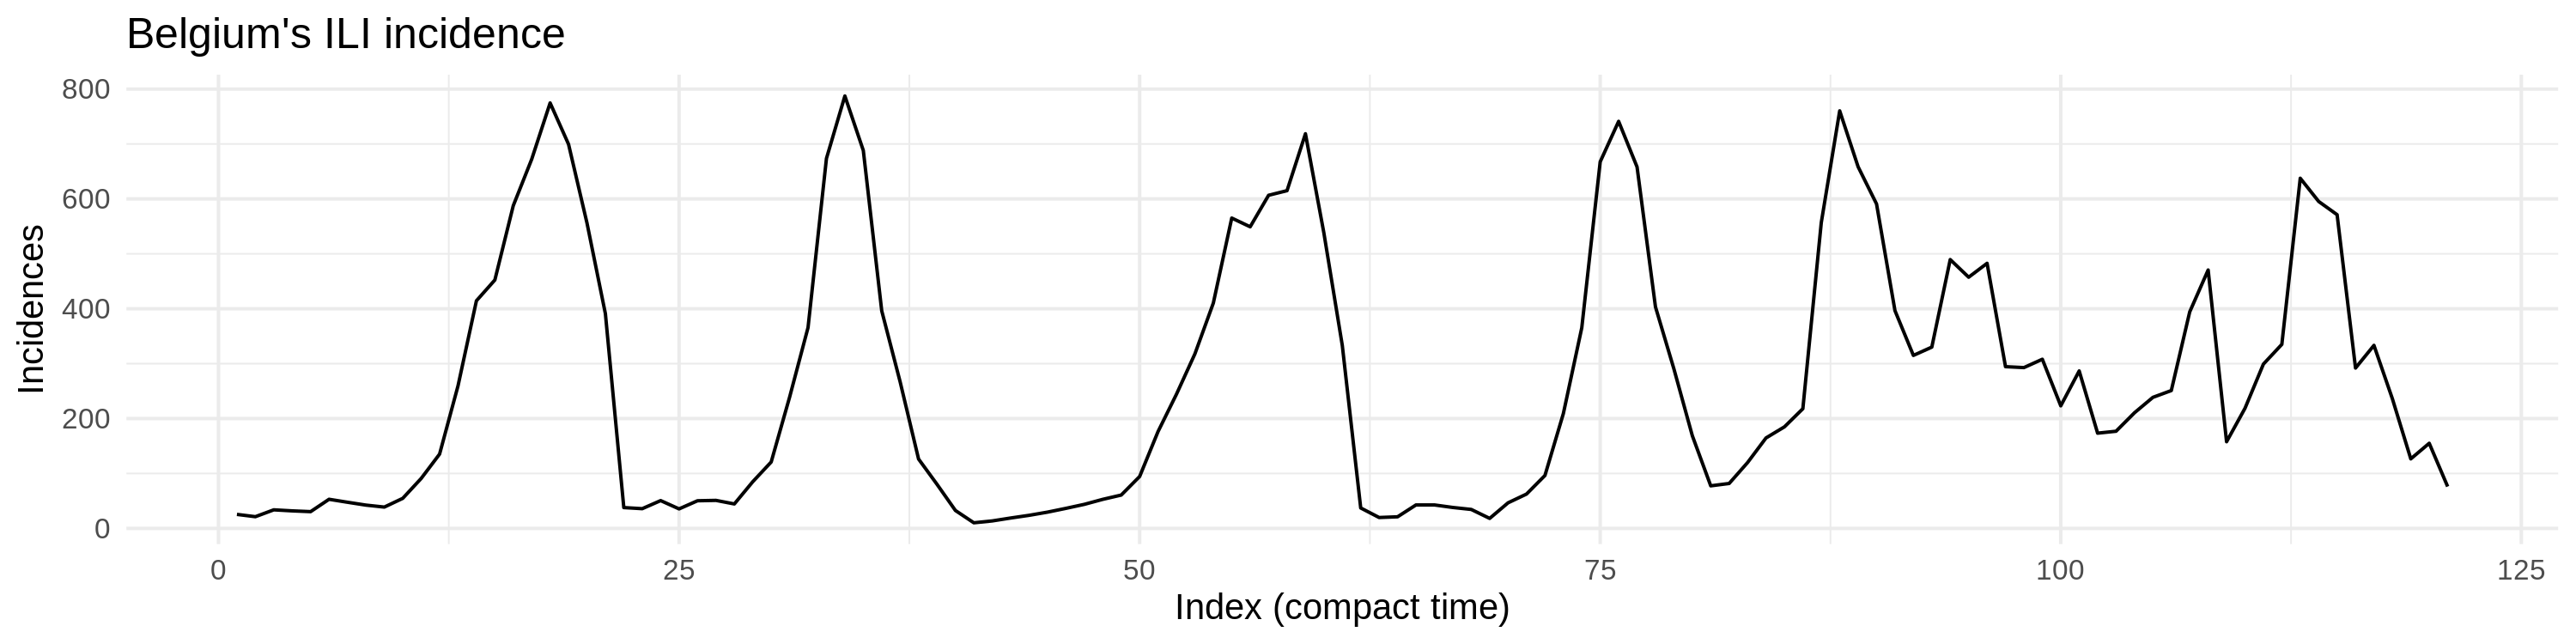

In [36]:
be_idx <- ts_clean %>%
  filter(location == "BE") %>%
  arrange(date) %>%
  mutate(t_idx = row_number())     # compact time index

options(repr.plot.width = 20, repr.plot.height = 5, repr.plot.res = 150)

ggplot(be_idx, aes(t_idx, value)) +
  geom_line(linewidth = 0.9, color = "black") +
  labs(title = "Belgium's ILI incidence ",
       x = "Index (compact time)", y = "Incidences") +
  theme_minimal(base_size = 20)


In [37]:
sum(is.na(ts_clean))

[1] 21

In [38]:
ts_clean_wide <- ts_clean %>%
  select(date, location, value_clean) %>%
  arrange(date, location) %>%
  pivot_wider(
    names_from = location,
    values_from = value_clean,
    values_fill = NA_real_ )

sum(is.na(ts_clean_wide))

[1] 0

## VAR

In [39]:
# Potential optimization is to remove the box-cox transformation in a loop
run_big_var <- function (data, p, h, lam=0){

  train_final <- as.matrix(BoxCox(data + 1, lambda = lam))

  var_mod <- constructModel(train_final,
                            p = p,
                            h = h,
                            struct = 'HLAGOO',
                            cv = "Rolling",
                            gran = c(150, 10),
                            verbose = F,
                            rolling_oos = TRUE
                            )

  var_fit <- cv.BigVAR(var_mod)
  pred <- predict(var_fit, n.ahead = h, confint=TRUE)
  pred_final <- round(InvBoxCox(pred, lambda = lam) - 1)
  return (pred_final)
}

In [40]:
weeks_outside <- function(earliest, latest, week_max = 53L) {
  # valid weeks are [latest+1 .. week_max] U [1 .. earliest-1]
  v1 <- if (latest < week_max) seq.int(latest + 1L, week_max) else integer()
  v2 <- if (earliest > 1L)   seq.int(1L, earliest - 1L)       else integer()
  return (unique(c(v1, v2)))
}

In [41]:
advance_valid_weeks <- function(start_date, h, valid_weeks = c(49:53, 1:12)) {
  d <- as.Date(start_date)
  steps <- 0L
  while (steps < h) {
    d <- d + weeks(1)
    if (isoweek(d) %in% valid_weeks) steps <- steps + 1L
  }
  return (d)
}

In [42]:
run_format_var <- function(data, p, h, lam = 0, valid_weeks = c(49:53, 1:12)) {
  stopifnot("date" %in% names(data))
  data <- arrange(data, date)

  country_names <- setdiff(names(data), "date")
  train_window  <- as.matrix(select(data, all_of(country_names)))

  res   <- run_big_var(train_window, p = p, h = h, lam = lam)
  pred  <- res[[1]]
  lower <- res[[2]]
  upper <- res[[3]]

  last_date  <- as.Date(max(data$date, na.rm = TRUE))
  vw <- weeks_outside(global_consensus$earliest_week, global_consensus$latest_week)
  target_date <- advance_valid_weeks(last_date, h, vw)

  to_row <- function(mat) {
    vals <- if (is.null(dim(mat))) as.numeric(mat) else as.numeric(mat[, 1, drop = TRUE])
    tibble(last_train_date = last_date, date = target_date, !!!setNames(as.list(vals), country_names))
  }

  list(
    pred  = to_row(pred)  %>% mutate(horizon = h),
    upper = to_row(upper) %>% mutate(horizon = h),
    lower = to_row(lower) %>% mutate(horizon = h)
  )
}

In [43]:
multi_horizon <- function(data, p, h, lam = 0) {
  pred_all  <- vector("list", h)
  upper_all <- vector("list", h)
  lower_all <- vector("list", h)

  for (hh in seq_len(h)) {
    out <- run_format_var(data, p = p, h = hh, lam = lam)
    pred_all[[hh]]  <- out$pred
    upper_all[[hh]] <- out$upper
    lower_all[[hh]] <- out$lower
  }

  list(
    pred  = bind_rows(pred_all),
    upper = bind_rows(upper_all),
    lower = bind_rows(lower_all)
  )
}

## Import Updated Data Point

merge rule:

1. Always recheck the last 4 updates. If there is a different in value, take the new ones
2. Except the new file has NAN, then don't take it

3. Update with new target date

4. If there is NAN in the new data, extrapolate with slime, so not as naive as carry forward, but limit by max 3 consecutive NANs. If more, then drop the country

In [44]:
max_consec_na <- function(x) {
  r <- rle(is.na(x))
  if (!any(r$values)) return(0L)
  max(r$lengths[r$values])
}

In [45]:
# merge_update <- function (url_update, past_df, cit_excl, limit_consec_na=3){

# # Get the link of the new data
# ili_update <- read_csv(url_update, show_col_types = FALSE)

# # Update and clean
# ili_update_clean <- ili_update %>% select(truth_date, location, value) %>%
#                                     rename(date = truth_date) %>%
#                                     filter(!location %in% cit_excl)

# # Check the last values
# past_check_nweek = 3
# dates_to_check <- tail(past_df$date, past_check_nweek)
# ili_check <- ili_update_clean %>% filter(date %in% dates_to_check) %>% filter(!is.na(value))

# # Merge rule 1 and 2
# past_clean <- past_df
# #  %>% select(date, location, value_clean) %>%
# #   rename(value = value_clean)

# # Update the data
# update1 <- rows_upsert(past_clean, ili_check, by = c("date", "location"))

# ## Do the step 3
# # The new date from new dataset
# last_date  <- as.Date(max(past_clean$date, na.rm = TRUE))
# valid_weeks <- weeks_outside(global_consensus$earliest_week,  global_consensus$latest_week)
# expected_date <- advance_valid_weeks(last_date, 1, valid_weeks)

# print(paste("the expected next date data is on", expected_date))

# ili_new <- ili_update_clean %>% filter(date %in% expected_date)
# update2 <- bind_rows(update1, ili_new)
# ts_wide2 <- update2 %>% pivot_wider(names_from = location, values_from = value, values_fill = NA_real_ )


# # Do the step 4
# # Being lazy by just turning the wide to long bcs then i don't need to check the dates
# long_new <- ts_wide2 %>%
#   pivot_longer(-date, names_to = "location", values_to = "value")

# keep_loc <- long_new %>%
#   group_by(location) %>%
#   summarise(max_na_run = max_consec_na(value), .groups = "drop") %>%
#   filter(max_na_run <= limit_consec_na) %>%
#   pull(location)

# dropped_loc <- setdiff(unique(long_new$location), keep_loc)

# ts_train_bv <- long_new %>%
#   filter(location %in% keep_loc) %>%
#   group_by(location) %>%
#   arrange(date, .by_group = TRUE) %>%
#   mutate(
#     value_mid = na.approx(
#       value,
#       x      = as.numeric(date),
#       na.rm  = FALSE,
#       maxgap = limit_consec_na
#     ),

#     value_filled = zoo::na.locf(value_mid, na.rm = FALSE)
#   ) %>%
#   ungroup() %>%
#   select(date, location, value = value_filled) %>%
#   pivot_wider(names_from = location, values_from = value, values_fill = NA_real_) %>%
#   arrange(date)

# return (list(train_bv = ts_train_bv, updated_past = update2))
# }

In [46]:
merge_update <- function(url_update, past_df, cit_excl, panel_locs = NULL, limit_consec_na = 3) {


  ili_update <- read_csv(url_update, show_col_types = FALSE)

  ili_update_clean <- ili_update %>%
    select(truth_date, location, value) %>%
    rename(date = truth_date) %>%
    mutate(date = as.Date(date)) %>%
    filter(!location %in% cit_excl)

  if (is.null(panel_locs)) {
    panel_locs <- setdiff(unique(past_df$location), cit_excl)
  }

  start_cutoff <- as.Date("2024-12-01")

  # snapshot "file date" = max date seen in the update file + 5 days
  # file_date <- (max(ili_update_clean$date, na.rm = TRUE) + 5)

  # Build grid on the panel and find NA cells in the *update* since cutoff
  na_rep <- ili_update_clean %>%
    filter(date >= start_cutoff) %>%
    complete(date, location = panel_locs) %>%
    mutate(is_na = is.na(value)) %>%
    filter(is_na)
    # %>%
    # transmute(file_date = file_date, date, location)



  past_check_nweek <- 5L
  dates_to_check   <- tail(sort(unique(past_df$date)), past_check_nweek)

  ili_check <- ili_update_clean %>%
    filter(date %in% dates_to_check, !is.na(value))

  na_coords <- past_df %>%
    filter(is.na(value)) %>%
    distinct(date, location)

  fills_from_update <- ili_update_clean %>%
    semi_join(na_coords, by = c("date","location")) %>%
    filter(!is.na(value)) %>%
    distinct(date, location, .keep_all = TRUE)

  to_upsert <- bind_rows(ili_check, fills_from_update) %>%
    distinct(date, location, .keep_all = TRUE)

  update1 <- dplyr::rows_upsert(past_df, to_upsert, by = c("date","location"))

  last_date     <- as.Date(max(update1$date, na.rm = TRUE))
  valid_weeks   <- weeks_outside(global_consensus$earliest_week, global_consensus$latest_week)
  expected_date <- advance_valid_weeks(last_date, 1, valid_weeks)
  message(sprintf("expected next date: %s", expected_date))

  ili_new <- ili_update_clean %>% filter(date == expected_date)

  update2 <- bind_rows(update1, ili_new) %>%
    filter(location %in% panel_locs) %>%
    arrange(date, location)

  ts_wide2 <- update2 %>%
    complete(date, location = panel_locs) %>%
    pivot_wider(names_from = location, values_from = value, values_fill = NA_real_) %>%
    arrange(date)

  long_new <- ts_wide2 %>%
    pivot_longer(-date, names_to = "location", values_to = "value")

  ts_train_bv <- long_new %>%
    group_by(location) %>%
    arrange(date, .by_group = TRUE) %>%
    mutate(
      value_mid    = zoo::na.approx(value, x = as.numeric(date), na.rm = FALSE, maxgap = limit_consec_na),
      value_filled = zoo::na.locf(value_mid, na.rm = FALSE)
    ) %>%
    ungroup() %>%
    select(date, location, value = value_filled) %>%
    pivot_wider(names_from = location, values_from = value, values_fill = NA_real_) %>%
    arrange(date)

  list(
    train_bv     = ts_train_bv,
    updated_past = update2,
    na_recap = na_rep
  )
}


## Run

In [47]:
# url_update  <- "https://raw.githubusercontent.com/european-modelling-hubs/RespiCast-SyndromicIndicators/main/target-data/ERVISS/snapshots/2024-12-20-ILI_incidence.csv"
# past_df <- ts_clean
# cit_excl <- city_excluded

# ts_train_bv <- merge_update(url_update, past_df, cit_excl)

In [48]:
# hor = 4
# lag = 6

# res_df <- multi_horizon(ts_train_bv, p=lag, h=hor)

In [49]:
run_all <- function(url_update_list, past_df, cit_excl, hor, lag, dates_file_exist, pred_df  = NULL, upper_df = NULL, lower_df = NULL, na_recap_df=NULL) {

i = 1
  for (uu in url_update_list) {

    out_merge_update <- merge_update(uu, past_df, cit_excl)
    ts_train_bv <- out_merge_update$train_bv

    past_df <- out_merge_update$updated_past

    na_chunk <- out_merge_update$na_recap %>% mutate(dates_file_exist = as.Date(dates_file_exist[i]))
    print("Process file date:\n")
    print(as.Date(dates_file_exist[i]))

    na_recap_df <-bind_rows(na_recap_df, na_chunk)
    i = i + 1


    res <- multi_horizon(ts_train_bv, p = lag, h = hor)

    # bind_rows() ignores NULL, so this works for the first iteration too
    pred_df  <- bind_rows(pred_df, res$pred)
    upper_df <- bind_rows(upper_df, res$upper)
    lower_df <- bind_rows(lower_df, res$lower)
  }

  list(pred = pred_df, upper = upper_df, lower = lower_df, truth_data = past_df, na_recap = na_recap_df)
}

In [50]:
make_url <- function(d)
  sprintf(
    "https://raw.githubusercontent.com/european-modelling-hubs/RespiCast-SyndromicIndicators/main/target-data/ERVISS/snapshots/%s-ILI_incidence.csv",
    format(d, "%Y-%m-%d")
  )

exists_url <- function(u) {
  resp <- request(u) |>
    req_method("HEAD") |>
    # <- do NOT throw on 404 etc.
    req_error(is_error = function(resp) FALSE) |>
    req_timeout(10) |>
    req_perform()
  resp_status(resp) < 400
}

In [51]:
shift_weeks <- function(w, k = 1L, week_max = 53L) ((w - 1L + k) %% week_max) + 1L

valid_weeks <- weeks_outside(global_consensus$earliest_week,  global_consensus$latest_week)
shift_weeks_list <- shift_weeks(valid_weeks, 1L, 53L)

In [52]:
start <- ymd("2024-10-18")

dates_file <- seq(start, start + years(2), by = "1 week")
dates_file <- dates_file[isoweek(dates_file) %in% shift_weeks_list]

cand_urls <- make_url(dates_file)
url_update_list <- cand_urls[map_lgl(cand_urls, exists_url) ]

In [53]:
url_update_list

[1] "https://raw.githubusercontent.com/european-modelling-hubs/RespiCast-SyndromicIndicators/main/target-data/ERVISS/snapshots/2024-11-15-ILI_incidence.csv"
 [2] "https://raw.githubusercontent.com/european-modelling-hubs/RespiCast-SyndromicIndicators/main/target-data/ERVISS/snapshots/2024-11-22-ILI_incidence.csv"
 [3] "https://raw.githubusercontent.com/european-modelling-hubs/RespiCast-SyndromicIndicators/main/target-data/ERVISS/snapshots/2024-11-29-ILI_incidence.csv"
 [4] "https://raw.githubusercontent.com/european-modelling-hubs/RespiCast-SyndromicIndicators/main/target-data/ERVISS/snapshots/2024-12-06-ILI_incidence.csv"
 [5] "https://raw.githubusercontent.com/european-modelling-hubs/RespiCast-SyndromicIndicators/main/target-data/ERVISS/snapshots/2024-12-13-ILI_incidence.csv"
 [6] "https://raw.githubusercontent.com/european-modelling-hubs/RespiCast-SyndromicIndicators/main/target-data/ERVISS/snapshots/2024-12-20-ILI_incidence.csv"
 [7] "https://raw.githubusercontent.com/european-modelling-hubs/RespiCast-SyndromicIndicators/main/target-data/ERVISS/snapshots/2025-01-03-ILI_incidence.csv"
 [8] "https://raw.githubusercontent.com/european-modelling-hubs/RespiCast-SyndromicIndicators/main/target-data/ERVISS/snapshots/2025-01-10-ILI_incidence.csv"
 [9] "https://raw.githubusercontent.com/european-modelling-hubs/RespiCast-SyndromicIndicators/main/target-data/ERVISS/snapshots/2025-01-17-ILI_incidence.csv"
[10] "https://raw.githubusercontent.com/european-modelling-hubs/RespiCast-SyndromicIndicators/main/target-data/ERVISS/snapshots/2025-01-24-ILI_incidence.csv"
[11] "https://raw.githubusercontent.com/european-modelling-hubs/RespiCast-SyndromicIndicators/main/target-data/ERVISS/snapshots/2025-01-31-ILI_incidence.csv"
[12] "https://raw.githubusercontent.com/european-modelling-hubs/RespiCast-SyndromicIndicators/main/target-data/ERVISS/snapshots/2025-02-07-ILI_incidence.csv"
[13] "https://raw.githubusercontent.com/european-modelling-hubs/RespiCast-SyndromicIndicators/main/target-data/ERVISS/snapshots/2025-02-14-ILI_incidence.csv"
[14] "https://raw.githubusercontent.com/european-modelling-hubs/RespiCast-SyndromicIndicators/main/target-data/ERVISS/snapshots/2025-02-21-ILI_incidence.csv"
[15] "https://raw.githubusercontent.com/european-modelling-hubs/RespiCast-SyndromicIndicators/main/target-data/ERVISS/snapshots/2025-02-28-ILI_incidence.csv"
[16] "https://raw.githubusercontent.com/european-modelling-hubs/RespiCast-SyndromicIndicators/main/target-data/ERVISS/snapshots/2025-03-07-ILI_incidence.csv"
[17] "https://raw.githubusercontent.com/european-modelling-hubs/RespiCast-SyndromicIndicators/main/target-data/ERVISS/snapshots/2025-03-14-ILI_incidence.csv"
[18] "https://raw.githubusercontent.com/european-modelling-hubs/RespiCast-SyndromicIndicators/main/target-data/ERVISS/snapshots/2025-03-21-ILI_incidence.csv"
[19] "https://raw.githubusercontent.com/european-modelling-hubs/RespiCast-SyndromicIndicators/main/target-data/ERVISS/snapshots/2025-03-28-ILI_incidence.csv"

In [54]:
dates_file_exist = c('2024-11-15', '2024-11-22', '2024-11-29', '2024-12-06', '2024-12-13', '2024-12-20', '2025-01-03', '2025-01-10', '2025-01-17', '2025-01-24', '2025-01-31', '2025-02-07', '2025-02-14', '2025-02-21', '2025-02-28', '2025-03-07', '2025-03-14', '2025-03-21', '2025-03-28')

In [55]:
past_df <- ts_clean %>% select(date, location, value_clean) %>% rename(value = value_clean)
cit_excl <- city_excluded
hor = 4
lag = 6
dates_file_exist = dates_file_exist

res_df <- run_all(url_update_list, past_df, cit_excl, hor, lag, dates_file_exist)

expected next date: 2024-11-10



[1] "Process file date:\n"
[1] "2024-11-15"


expected next date: 2024-11-17



[1] "Process file date:\n"
[1] "2024-11-22"


expected next date: 2024-11-24



[1] "Process file date:\n"
[1] "2024-11-29"


expected next date: 2024-12-01



[1] "Process file date:\n"
[1] "2024-12-06"


expected next date: 2024-12-08



[1] "Process file date:\n"
[1] "2024-12-13"


expected next date: 2024-12-15



[1] "Process file date:\n"
[1] "2024-12-20"


expected next date: 2024-12-22



[1] "Process file date:\n"
[1] "2025-01-03"


expected next date: 2024-12-29



[1] "Process file date:\n"
[1] "2025-01-10"


expected next date: 2025-01-05



[1] "Process file date:\n"
[1] "2025-01-17"


expected next date: 2025-01-12



[1] "Process file date:\n"
[1] "2025-01-24"


expected next date: 2025-01-19



[1] "Process file date:\n"
[1] "2025-01-31"


expected next date: 2025-01-26



[1] "Process file date:\n"
[1] "2025-02-07"


expected next date: 2025-02-02



[1] "Process file date:\n"
[1] "2025-02-14"


expected next date: 2025-02-09



[1] "Process file date:\n"
[1] "2025-02-21"


expected next date: 2025-02-16



[1] "Process file date:\n"
[1] "2025-02-28"


expected next date: 2025-02-23



[1] "Process file date:\n"
[1] "2025-03-07"


expected next date: 2025-03-02



[1] "Process file date:\n"
[1] "2025-03-14"


expected next date: 2025-03-09



[1] "Process file date:\n"
[1] "2025-03-21"


expected next date: 2025-03-16



[1] "Process file date:\n"
[1] "2025-03-28"


In [56]:
pred_df <- res_df$pred
upper_df <- res_df$upper
lower_df <- res_df$lower
truth_df <- res_df$truth_data

In [57]:
head(pred_df, 4) #date is the target date

last_train_date date       AT   BE CZ DK  EE  FI FR  GR  ⋯ IE IS LT LU   MT  
1 2024-11-10      2024-11-17 1942 86 18 128 198 14  68 696 ⋯  5 2   5 1840 4066
2 2024-11-10      2024-11-24 1880 86 19 105 184 16  79 694 ⋯  7 2   5 1618 4699
3 2024-11-10      2024-12-01 1826 90 21  94 175 20  93 695 ⋯  8 3   7 1496 5323
4 2024-11-10      2024-12-08 1779 98 23  89 170 26 111 698 ⋯ 11 4  10 1823 5924
  NL NO PL  RO horizon
1 24 36 359 1  1      
2 29 38 369 1  2      
3 33 41 375 1  3      
4 37 46 383 1  4

In [58]:
head(truth_df, 4)

date       location value
1 2015-11-08 AT       645.8
2 2015-11-08 BE        25.5
3 2015-11-08 CZ        19.3
4 2015-11-08 DK        38.8

In [59]:
truth_wide <- truth_df %>%  pivot_wider(names_from = location, values_from = value, values_fill = NA_real_) %>% arrange(date)

In [60]:
tail(truth_wide, 3)

date       AT     BE    CZ    DK    EE    FI    FR    GR     HU    IE   IS 
1 2025-03-02 2547.7 503.8 116.9 222.8 345.0 121.4 127.8 1275.2 916.0 15.6 8.1
2 2025-03-09 2059.3 246.7  79.4 205.4 347.6 115.3  91.2 1302.6 720.3 14.4 6.8
3 2025-03-16 1706.2 200.0  68.4 200.3 384.4 124.3  90.8 1085.4 541.7 11.4 7.4
  LT    LU    MT   NL   NO    PL    RO  
1 303.2  9900 4000 56.3 177.4 602.1 32.6
2 285.3  9500 5800 37.4 160.3 585.6 29.0
3 249.5 11300 3900 43.7 119.1 507.7 20.0

### Recheck the NA in the updated date

In [61]:
na_recap_df <- res_df$na_recap
head(na_recap_df, 5)

date       location value is_na dates_file_exist
1 2024-12-01 FI       NA    TRUE  2024-12-06      
2 2024-12-01 IE       NA    TRUE  2024-12-06      
3 2024-12-01 RO       NA    TRUE  2024-12-06      
4 2024-12-01 FI       NA    TRUE  2024-12-13      
5 2024-12-08 AT       NA    TRUE  2024-12-13

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


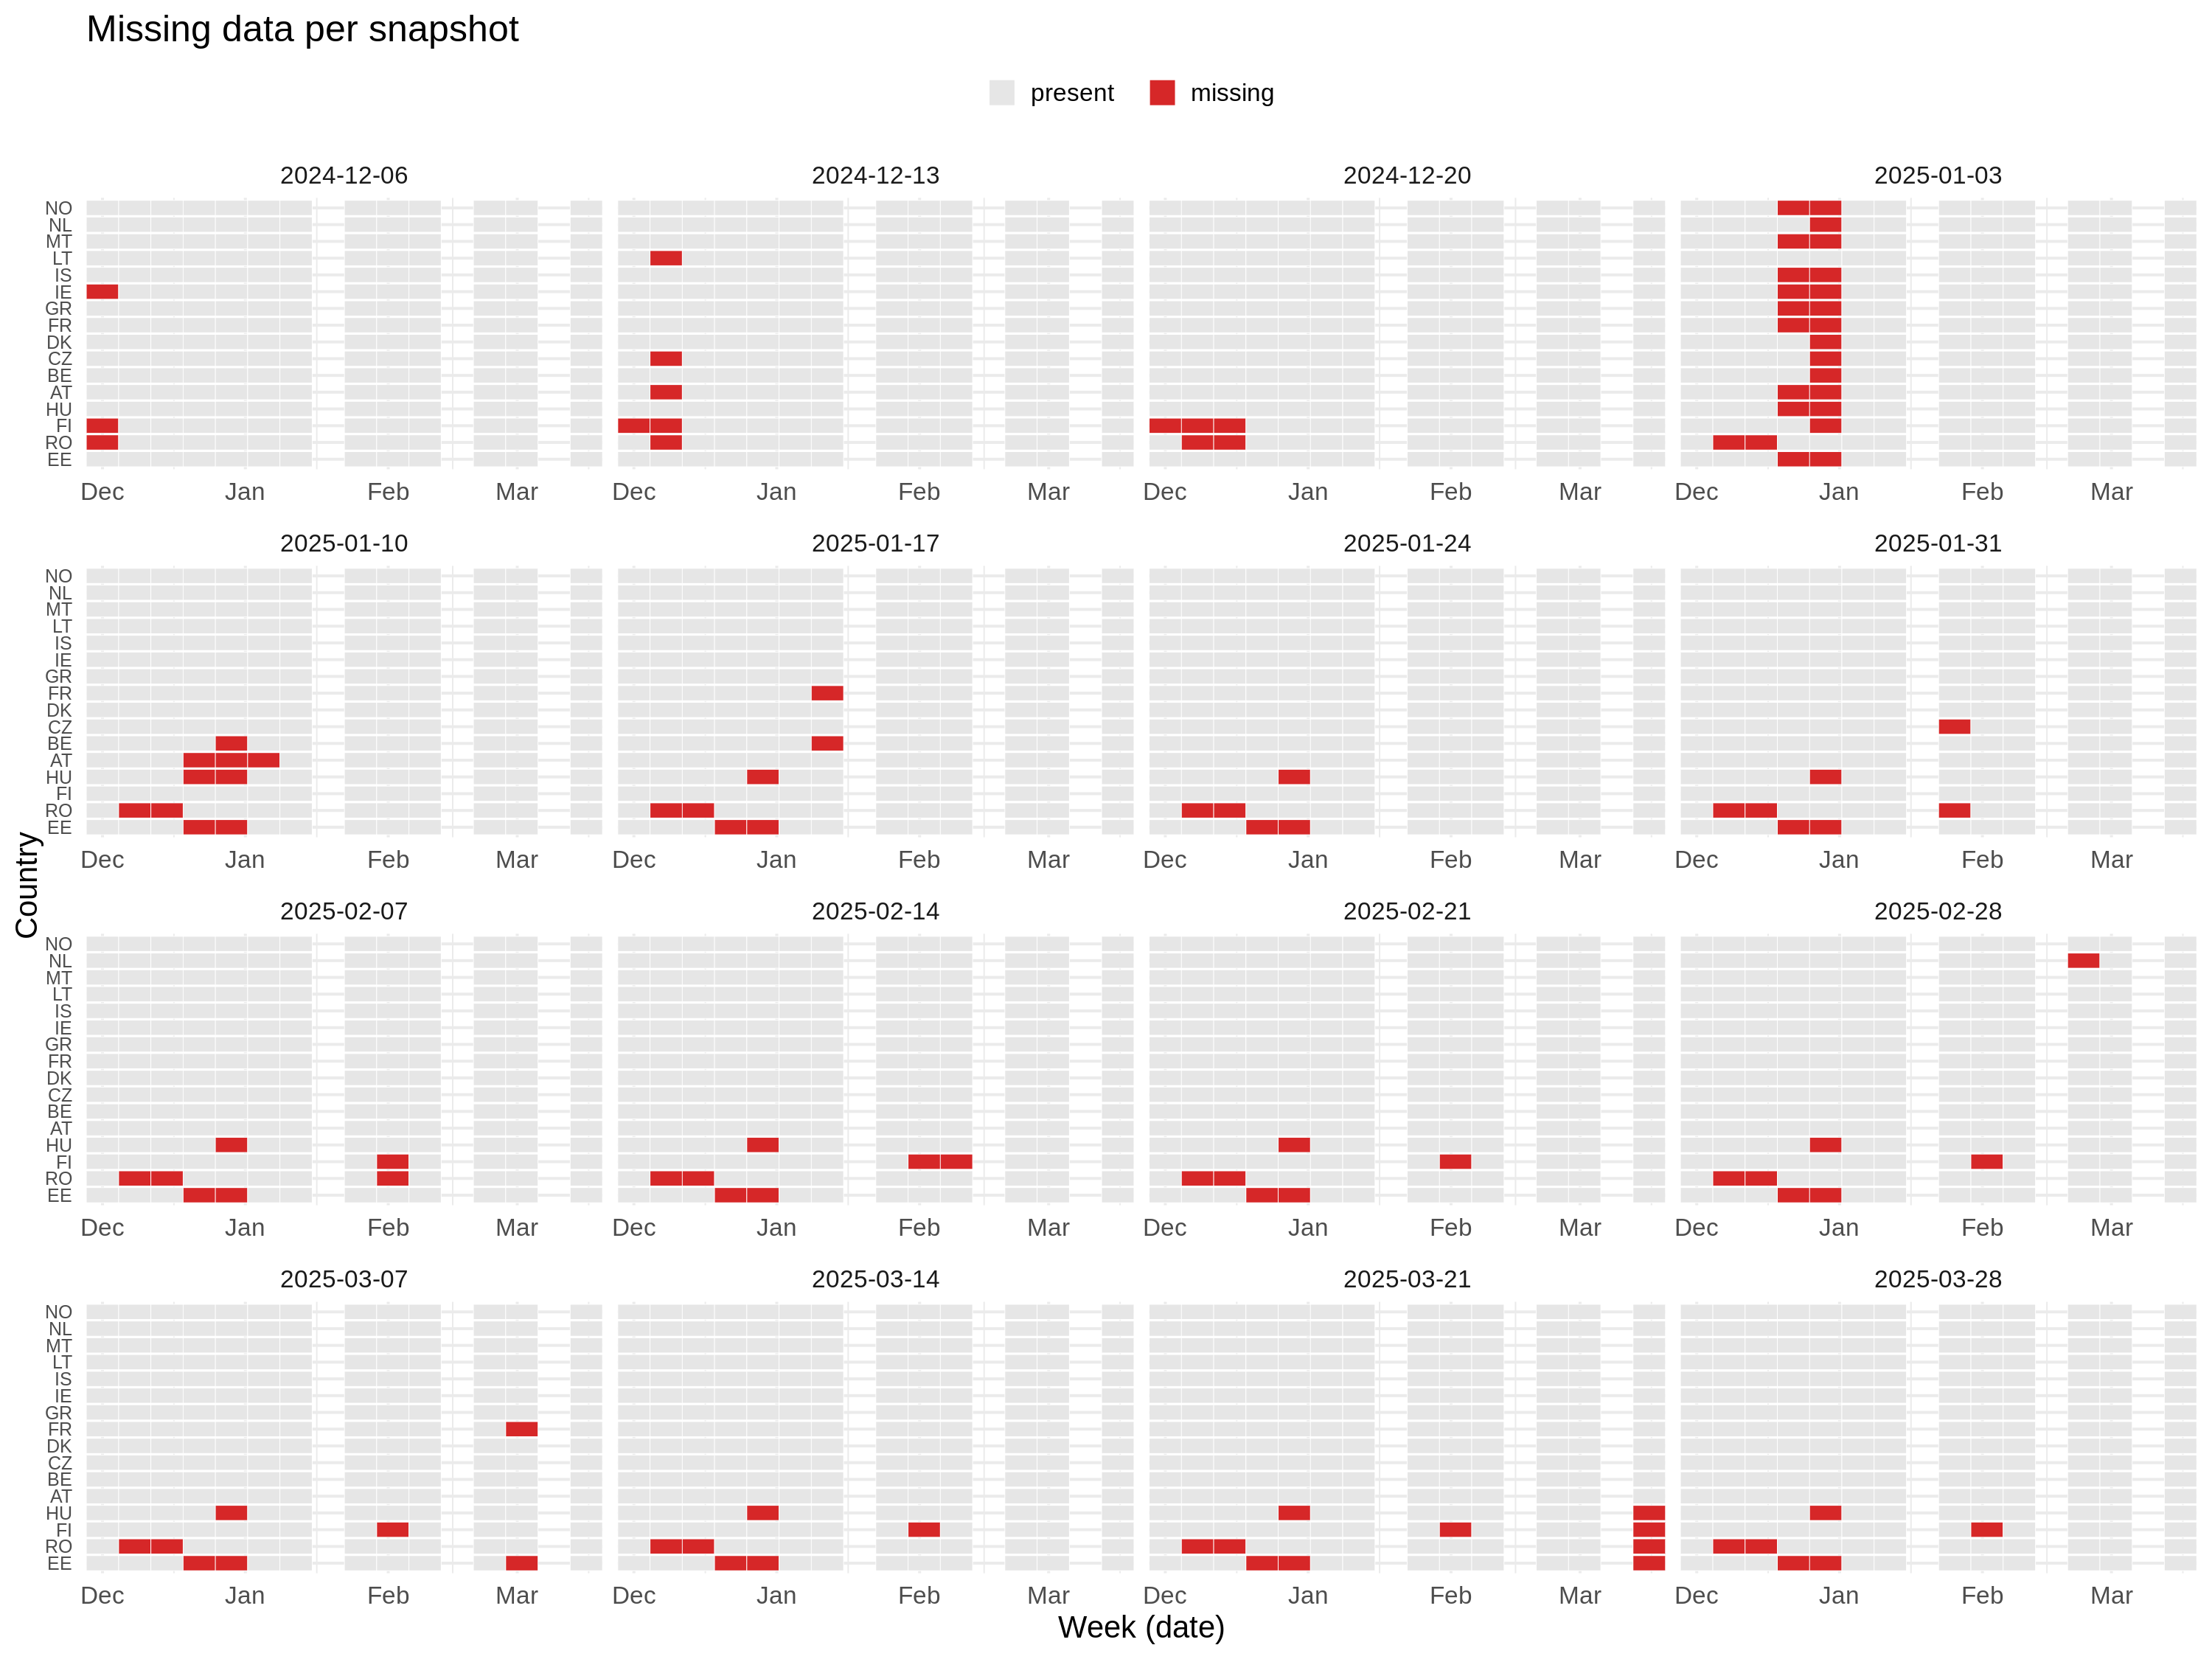

In [62]:
na_rec <- na_recap_df

all_files <- sort(unique(na_rec$dates_file_exist))
all_dates <- sort(unique(na_rec$date))
all_locs  <- sort(unique(na_rec$location))

grid <- expand_grid(dates_file_exist = all_files,
                           date = all_dates,
                           location = all_locs) %>%
  left_join(na_rec %>% mutate(missing = TRUE),
            by = c("dates_file_exist","date","location")) %>%
  mutate(missing = tidyr::replace_na(missing, FALSE))

last_fd <- max(all_files)
loc_order <- grid %>%
  filter(dates_file_exist == last_fd) %>%
  group_by(location) %>%
  summarise(n_missing = sum(missing), .groups = "drop") %>%
  arrange(desc(n_missing)) %>% pull(location)

grid <- grid %>% mutate(location = factor(location, levels = loc_order))


options(repr.plot.width = 20, repr.plot.height = 15)

d_min <- min(grid$date, na.rm = TRUE)
d_max <- max(grid$date, na.rm = TRUE)

p <- ggplot(grid, aes(x = date, y = location, fill = missing)) +
  geom_tile(width = 7, height = 0.9, colour = "white", size = 0.2) +

facet_wrap(~ dates_file_exist, scales = "free_x", ncol = 4) +
scale_x_date(
  date_breaks = "1 month", date_labels = "%b",
  minor_breaks = function(lims) seq(lims[1], lims[2], by = "1 week"),
  expand = c(0, 0)
)+


  scale_fill_manual(values = c(`TRUE` = "#d62728", `FALSE` = "#e6e6e6"),
                    labels = c("present","missing"), name = NULL) +
  scale_x_date(date_breaks = "1 month", date_labels = "%b", expand = c(0,0)) +
  theme_minimal(base_size = 20) +
  theme(legend.position = "top", axis.text.y = element_text(size = 12)) +
  labs(title = "Missing data per snapshot", x = "Week (date)", y = "Country")

p



In [63]:
na_truth <- truth_wide %>%
 pivot_longer(-date, names_to = "location", values_to = "value_truth") %>%
  filter(is.na(value_truth))

# the latest-ili-dataset
cc <- ili_latest %>%
  transmute(date = as.Date(truth_date),
            location,
            value_cc = value) %>%
  distinct(date, location, .keep_all = TRUE)

# 1) Compare: for each NA in truth, does cc have a row? if yes, is it NA or a value?
cmp <- na_truth %>%
  mutate(date = as.Date(date)) %>%
  select(date, location, value_truth) %>%
  left_join(cc, by = c("date","location")) %>%
  mutate(status = case_when(
    is.na(value_cc) & !is.na(value_truth) ~ "should_not_happen", # truth NA so this won't trigger
    is.na(value_cc) &  is.na(value_truth) ~ "cc_missing_or_NA",  # either no row or NA in cc
    !is.na(value_cc) & is.na(value_truth) ~ "cc_has_value"       # cc can fix truth
  ))


In [64]:
cmp

date       location value_truth value_cc status          
1 2024-11-10 FI       NA          3.6      cc_has_value    
2 2024-12-08 RO       NA           NA      cc_missing_or_NA
3 2024-12-15 RO       NA           NA      cc_missing_or_NA
4 2024-12-22 EE       NA           NA      cc_missing_or_NA
5 2024-12-29 EE       NA           NA      cc_missing_or_NA
6 2024-12-29 HU       NA           NA      cc_missing_or_NA
7 2025-02-02 FI       NA           NA      cc_missing_or_NA

## Save all the Predictions Overtime

## Evaluation

In [65]:
eval_score <- function(pred_mat, true_mat) {
  D <- pred_mat - true_mat

  return(tibble(
    region = colnames(pred_mat),
    MAE  = colMeans(abs(D), na.rm = TRUE),
    RMSE = sqrt(colMeans(D^2, na.rm = TRUE)),
  ))
}

In [66]:
keep_names <- names(truth_wide)

In [67]:
ss <- list()
for (hh in 1:hor) {

  max_date <- max(truth_wide$date)

  pred_h <- pred_df %>% filter(horizon == hh, date<= as.Date(max_date)) %>%
                        select(all_of(keep_names)) %>% arrange(desc(date))

  true_df <- truth_wide %>%
                select(all_of(keep_names)) %>%
                semi_join(pred_h %>% select(date), by = "date") %>% arrange(desc(date))

  pred_mat <- as.matrix(pred_h %>% select (-date))
  true_mat <- as.matrix(true_df %>% select (-date))

  if (identical(names(pred_mat), names(true_mat)) & (all(dim(pred_mat) == dim(true_mat)))){
    print('Calculating the score')
    ss[[hh]] <- eval_score(pred_mat, true_mat) %>% mutate(horizon = hh)
    }
  }
score_full <- bind_rows(ss)

[1] "Calculating the score"
[1] "Calculating the score"
[1] "Calculating the score"
[1] "Calculating the score"


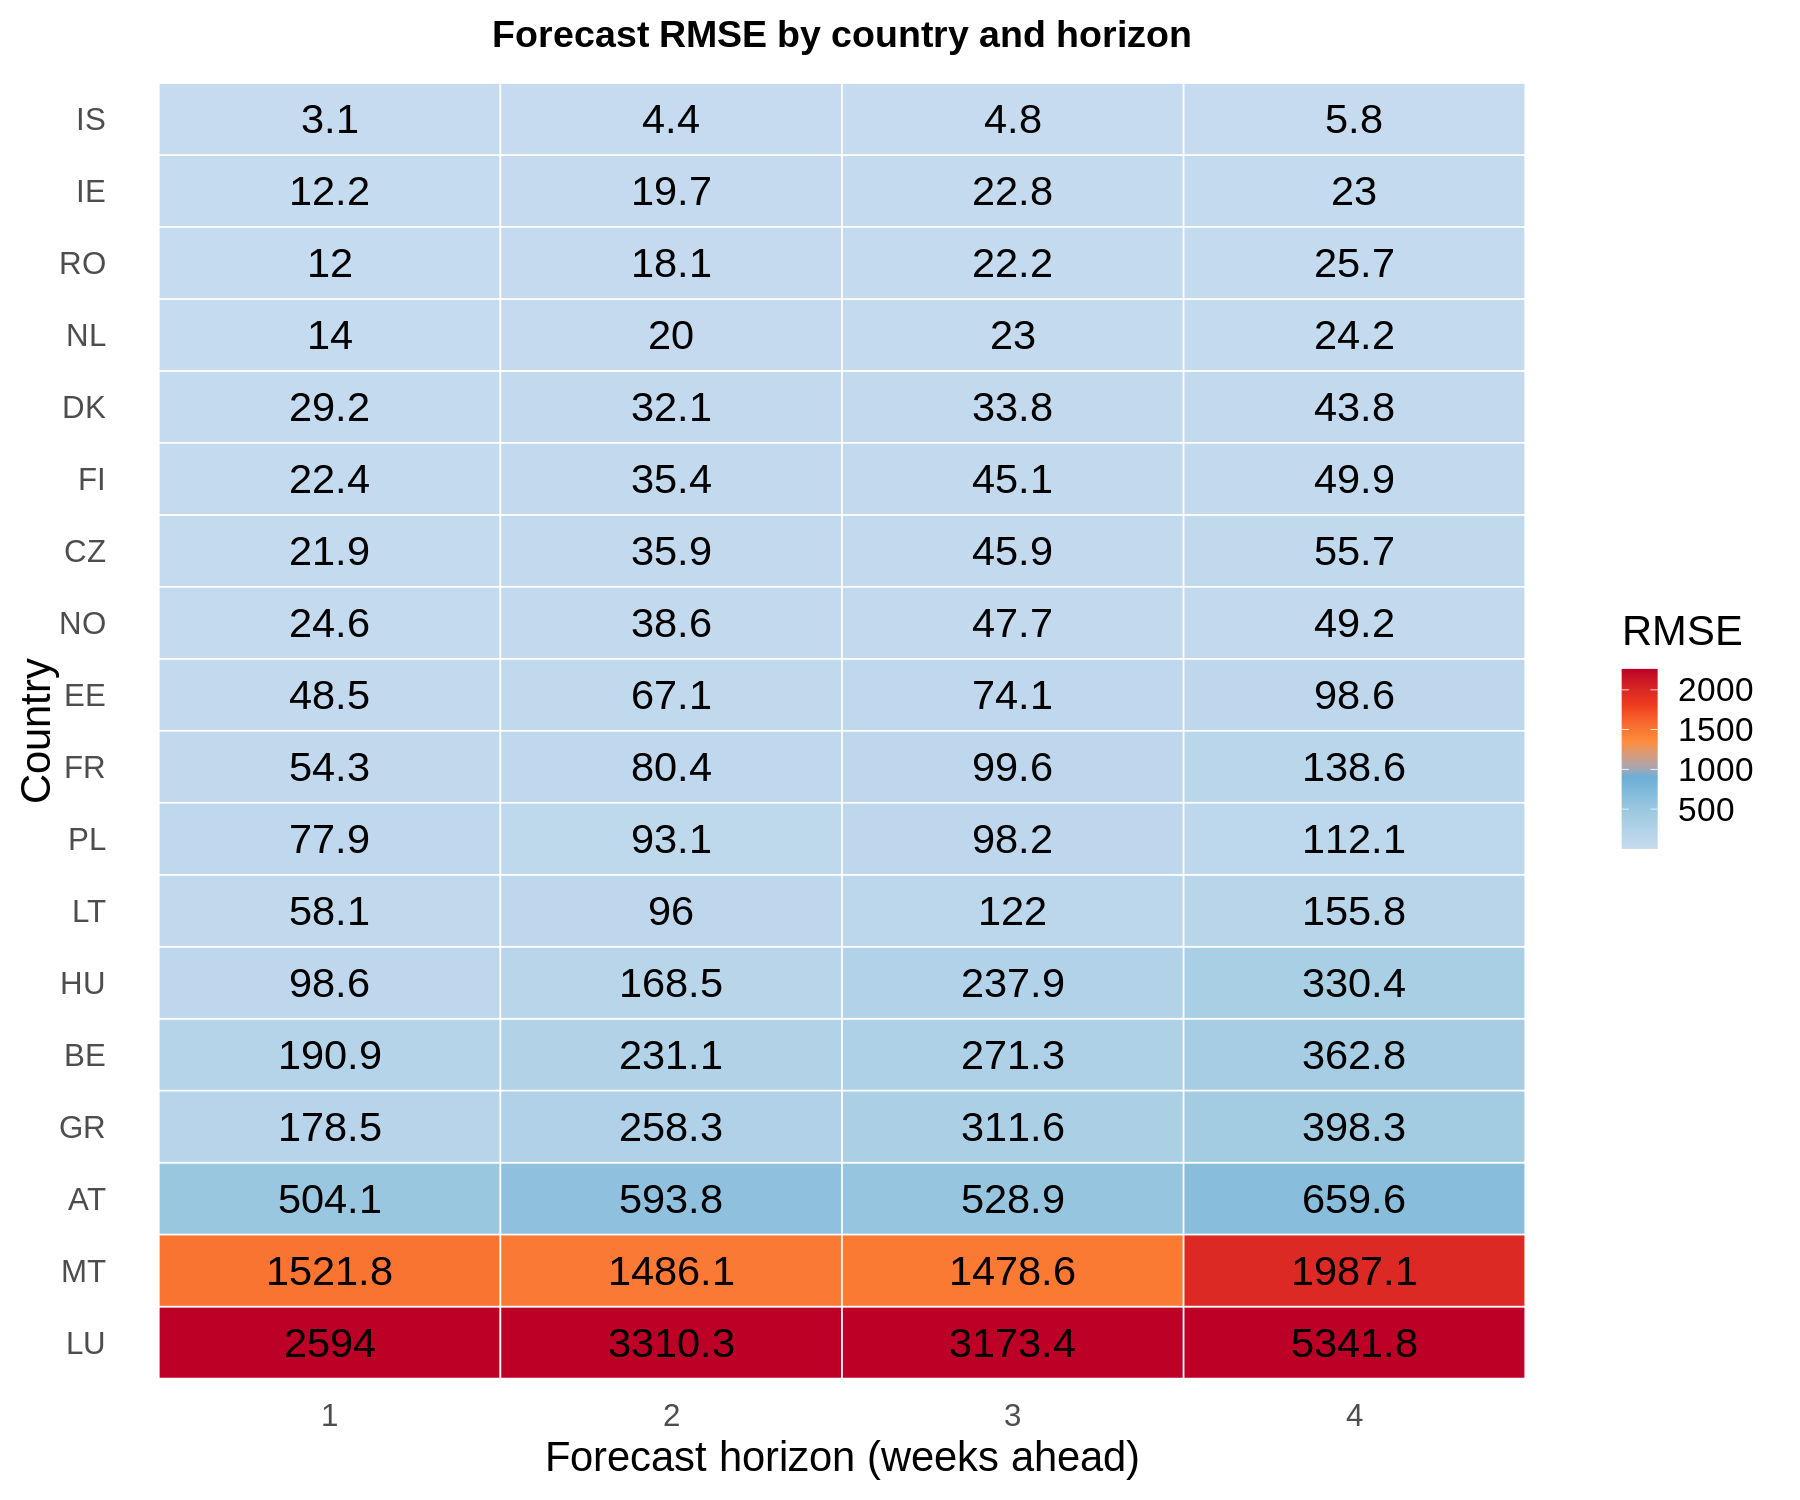

In [68]:
score_full$horizon <- factor(score_full$horizon)

# order countries by average RMSE
region_order <- score_full %>%
  group_by(region) %>%
  summarise(mean_rmse = mean(RMSE, na.rm = TRUE), .groups = "drop") %>%
  arrange(desc(mean_rmse)) %>%
  pull(region)

score_full$region <- factor(score_full$region, levels = region_order)

# set an upper cap for color scale (e.g. 95th percentile)
cap <- quantile(score_full$RMSE, 0.95, na.rm = TRUE)
score_full <- score_full %>% mutate(RMSE_capped = pmin(RMSE, cap))

options(repr.plot.width = 12, repr.plot.height = 10)  # tweak as you like
ggplot(score_full, aes(x = horizon, y = region, fill = RMSE_capped)) +
  geom_tile(color = "white") +
  geom_text(aes(label = round(RMSE, 1)), size = 7, color = "black") +
  scale_fill_gradientn(
    colours = c("#c6dbef", "#9ecae1", "#6baed6", "#fd8d3c", "#f03b20", "#bd0026"),
    name = "RMSE",
    limits = c(min(score_full$RMSE_capped), cap),
    oob = scales::squish
  ) +
  labs(
    title = "Forecast RMSE by country and horizon",
    x = "Forecast horizon (weeks ahead)",
    y = "Country"
  ) +
  theme_minimal(base_size = 20) +
  theme(
    panel.grid = element_blank(),
    axis.text.x = element_text(size = 15),
    axis.text.y = element_text(size = 15),
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5)
  )


In [69]:
overall_macro <- score_full %>%
  summarise(
    MAE_macro  = mean(MAE,  na.rm = TRUE),
    RMSE_macro = mean(RMSE, na.rm = TRUE)
  )


overall_macro

MAE_macro RMSE_macro
1 312.781   396.6379

In [70]:
per_country_macro <- score_full %>%
  group_by(region) %>%
  summarise(
    MAE_macro  = mean(MAE,  na.rm = TRUE),
    RMSE_macro = mean(RMSE, na.rm = TRUE),
    .groups = "drop"
  )

per_country_macro

region MAE_macro   RMSE_macro 
1  LU     2780.828105 3604.863739
2  MT     1358.966136 1618.403161
3  AT      430.552492  571.601920
4  GR      219.946107  286.692495
5  BE      193.235721  263.987229
6  HU      172.352189  208.856927
7  LT       90.011565  107.971330
8  PL       79.373740   95.346620
9  FR       72.830080   93.221782
10 EE       66.004662   72.084390
11 NO       30.971720   40.008195
12 CZ       30.449350   39.830937
13 FI       27.764780   38.193774
14 DK       29.015933   34.697164
15 NL       16.498697   20.300489
16 RO       14.629449   19.481384
17 IE       13.263979   19.425215
18 IS        3.362835    4.515277

## Plot Output Original Snapshot

In [71]:
sunday_now_past <- function(x, n){
  x   <- as.Date(x)
  mon <- floor_date(x, unit = "week", week_start = 1)
  sun <- mon + days(6)
  rev(seq(from = sun, by = "-1 week", length.out = n))
}

In [72]:
# get_plot_df <- function(pred_output, true_data, want = NULL, c=1){

# pred_time <- if (!is.null(want)) as.Date(sunday_now_past(want, n = hh)) else tail(true_data$date, hor)
# print(pred_time)
# pred_list <- list()
#  for (hh in 1:hor)
#   pred_list[[hh]] <- pred_output %>% filter(horizon == hh, date %in% pred_time[[hh]])
# pred_plot_df = bind_rows(pred_list)
# pred_plot_df <- pred_plot_df  %>% select(-horizon) %>% pivot_longer(-date, names_to = "country", values_to = "value")


# true_plot_df <- tail(true_data, hor)
# true_plot_df <- true_plot_df  %>% pivot_longer(-date, names_to = "country", values_to = "value")


# last_index <- nrow(true_data)
# lag_ts <- true_data %>% slice((last_index - hor - lag*c+ 1L) : (last_index - hor))
# lag_ts <- lag_ts %>% pivot_longer(-date, names_to = "country", values_to = "value")

# return (list(pred_plot = pred_plot_df, true_plot = true_plot_df, lag_plot = lag_ts))
# }

In [73]:
get_plot_df <- function(pred_output, true_data, want = NULL, c = 1){

  # --- build target dates (pred_time) ---
  if (!is.null(want)) {
    # use Sundays of the ISO week containing 'want', plus previous (hor-1) Sundays
    pred_time <- as.Date(sunday_now_past(as.Date(want), n = hor))
  } else {
    pred_time <- tail(sort(unique(true_data$date)), hor)
  }
  pred_time <- sort(pred_time)  # oldest -> newest

  # --- predictions: pick date h for horizon h ---
  pred_list <- lapply(seq_len(hor), function(hh){
    pred_output %>% filter(horizon == hh, date == pred_time[hh])
  })
  pred_plot_df <- bind_rows(pred_list) %>%
    select(-horizon) %>%
    pivot_longer(-date, names_to = "country", values_to = "value")

  # --- truth aligned to pred_time ---
  true_plot_df <- true_data %>%
    filter(date %in% pred_time) %>%
    pivot_longer(-date, names_to = "country", values_to = "value")

  # --- lag block: the 'lag*c' dates immediately before the first pred date ---
  min_pred <- min(pred_time)
  lag_len  <- lag * c
  lag_time <- true_data %>%
    filter(date < min_pred) %>%
    arrange(date) %>%
    slice_tail(n = lag_len) %>%
    pull(date)

  lag_ts <- true_data %>%
    filter(date %in% lag_time) %>%
    pivot_longer(-date, names_to = "country", values_to = "value")

  list(pred_plot = pred_plot_df, true_plot = true_plot_df, lag_plot = lag_ts)
}


In [74]:
wa = "2025-02-15"
pred_plot = get_plot_df(pred_df %>% select(-last_train_date), truth_wide, want=wa)$pred_plot
true_plot = get_plot_df(pred_df %>% select(-last_train_date), truth_wide, want=wa)$true_plot
lag_plot = get_plot_df(pred_df %>% select(-last_train_date), truth_wide, want=wa)$lag_plot

In [75]:
pred_plot$date %>% unique

[1] "2025-01-26" "2025-02-02" "2025-02-09" "2025-02-16"

In [76]:
truth_ff <- truth_wide %>%
  arrange(date) %>%
  fill(-date, .direction = "down")

lag_plot2 = get_plot_df(pred_df %>% select(-last_train_date), truth_ff, want=wa)$lag_plot

In [77]:
cf_mask <- truth_wide %>%
  arrange(date) %>%
  mutate(across(-date, ~ {
    x  <- .
    ff <- zoo::na.locf(x, na.rm = FALSE)
    is.na(x) & !is.na(ff)
  }))

truth_ff  <- truth_wide %>%
  arrange(date) %>%
  mutate(across(-date, ~ {
    x  <- .
    ff <- zoo::na.locf(x, na.rm = FALSE)
    ifelse(is.na(x) & !is.na(ff), ff, NA_real_)
  }))

lag_plot2 = get_plot_df(pred_df %>% select(-last_train_date), truth_ff, want=wa)$lag_plot

In [78]:
upper_plot = get_plot_df(upper_df %>% select(-last_train_date), truth_wide, want=wa)$pred_plot
lower_plot = get_plot_df(lower_df %>% select(-last_train_date), truth_wide, want=wa)$pred_plot

In [79]:
to_long <- function(df, label) df %>% mutate(series = label)

pdat <- bind_rows(
  to_long(true_plot, "true"),
  to_long(pred_plot, "pred"),
  to_long(lag_plot,  "lag"),
  to_long(lag_plot2,  "lag_carry_forward"),
  to_long(upper_plot,  "upper"),
  to_long(lower_plot,  "lower")
)

Warning message:
“Removed 30 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 109 rows containing missing values or values outside the scale range
(`geom_point()`).”


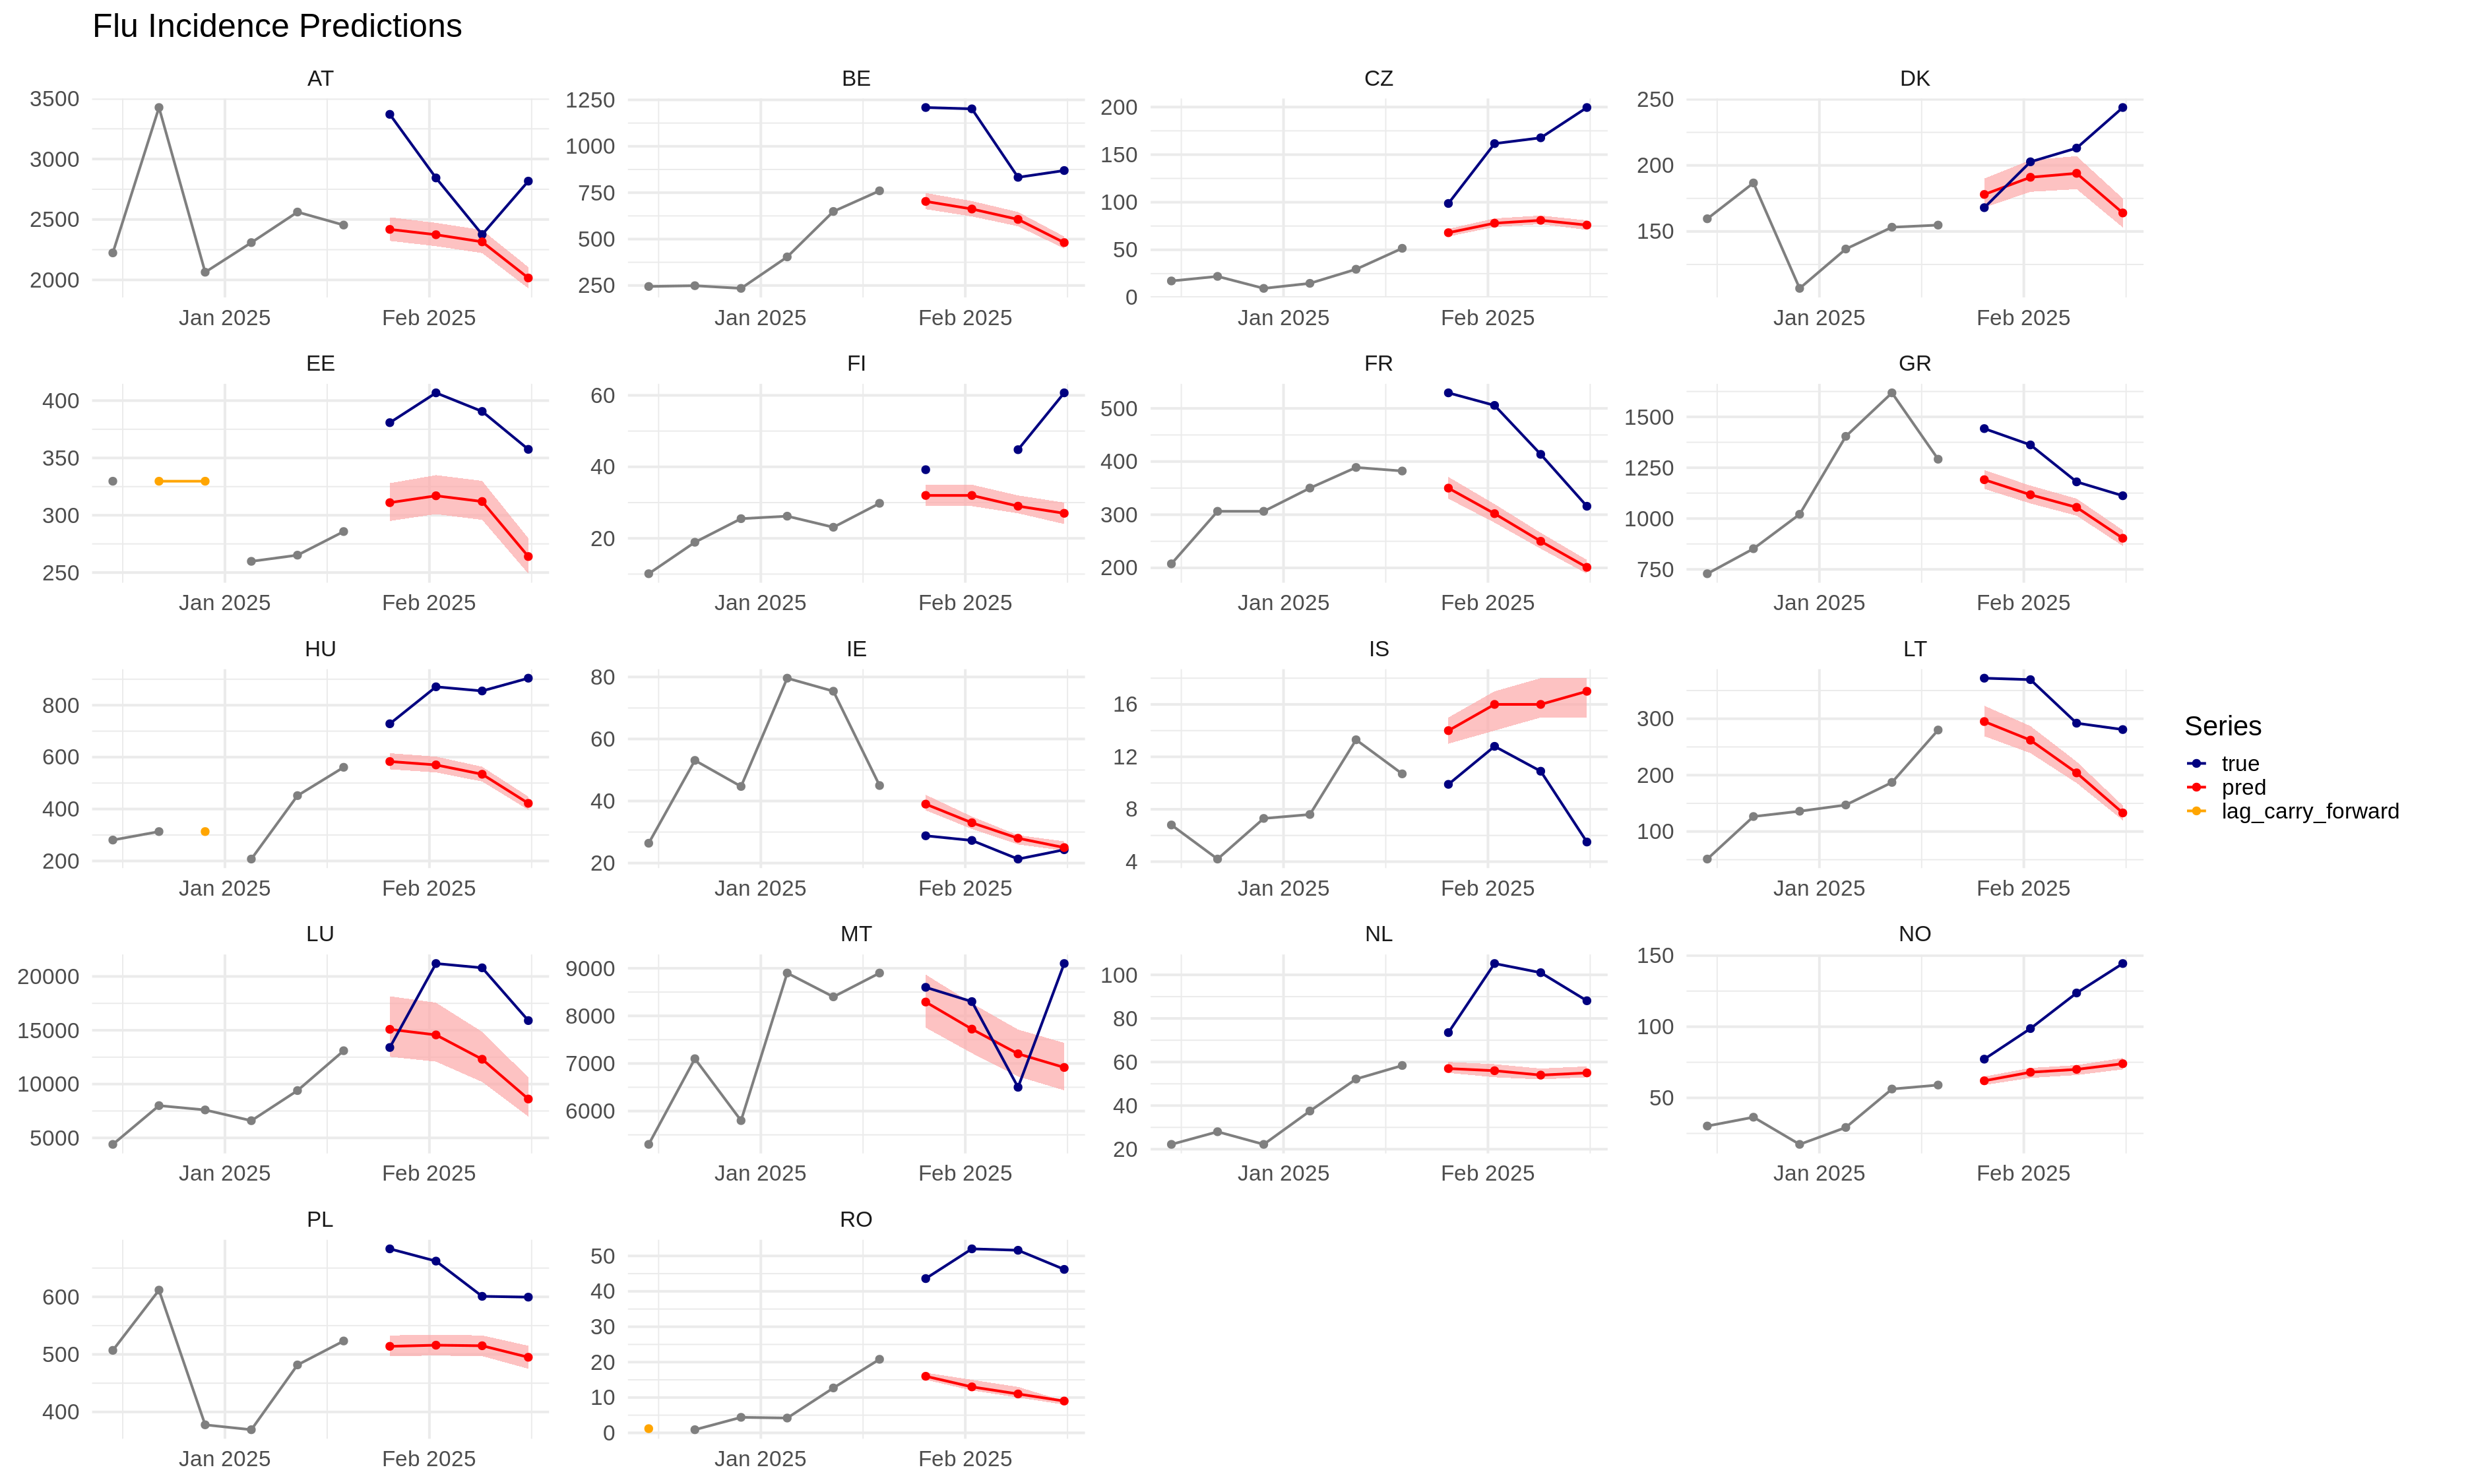

In [80]:
band_df <- pdat %>%
  filter(series %in% c("upper", "lower")) %>%
  pivot_wider(names_from = series, values_from = value) %>%
  filter(!is.na(lower) & !is.na(upper))


plot_data <- pdat %>% filter(!series %in% c("upper", "lower"))


options(repr.plot.width = 25, repr.plot.height = 15, repr.plot.res = 150)

ggplot() +
  geom_ribbon(
    data = band_df,
    aes(x = date, ymin = lower, ymax = upper),
    fill = "#fca7a7", alpha = 0.7
  ) +

  geom_line(data = plot_data, aes(x = date, y = value, color = series)) +
  geom_point(data = plot_data, aes(x = date, y = value, color = series),
             size = 1.8, alpha = 1) +

facet_wrap(~ country, scales = "free", ncol = 4) +
labs(title = "Flu Incidence Predictions", x = NULL, y = NULL) +
scale_x_date(date_labels = "%b %Y", date_breaks = "1 month") +
scale_color_manual(
  breaks = c("true","pred","lag_carry_forward"),   # include all series you mapped
  values = c(true = "navy", pred = "red", lag_carry_forward = "orange"),
  name = "Series"
) +
theme_minimal(base_size = 20)

## PLot with latest-ILI-incidences

In [81]:
head(ili_update0)

date       location value
1 2021-06-27 BE       26.7 
2 2021-06-27 CZ        3.5 
3 2021-06-27 EE       31.5 
4 2021-06-27 GR       33.5 
5 2021-06-27 IE        5.0 
6 2021-06-27 LT        0.0

In [82]:
updated_truth <- ili_update0 %>% filter(!location %in% city_excluded) %>% pivot_wider(names_from = location, values_from = value, values_fill = NA_real_ )

In [83]:
true_plot2 = get_plot_df(pred_df %>% select(-last_train_date), updated_truth, want=wa)$true_plot

to_long <- function(df, label) df %>% mutate(series = label)

pdat2 <- bind_rows(
  to_long(true_plot2, "true"),
  to_long(pred_plot, "pred"),
  to_long(lag_plot,  "lag"),
  to_long(lag_plot2,  "lag_carry_forward"),
  to_long(upper_plot,  "upper"),
  to_long(lower_plot,  "lower")
)

Warning message:
“Removed 30 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 109 rows containing missing values or values outside the scale range
(`geom_point()`).”


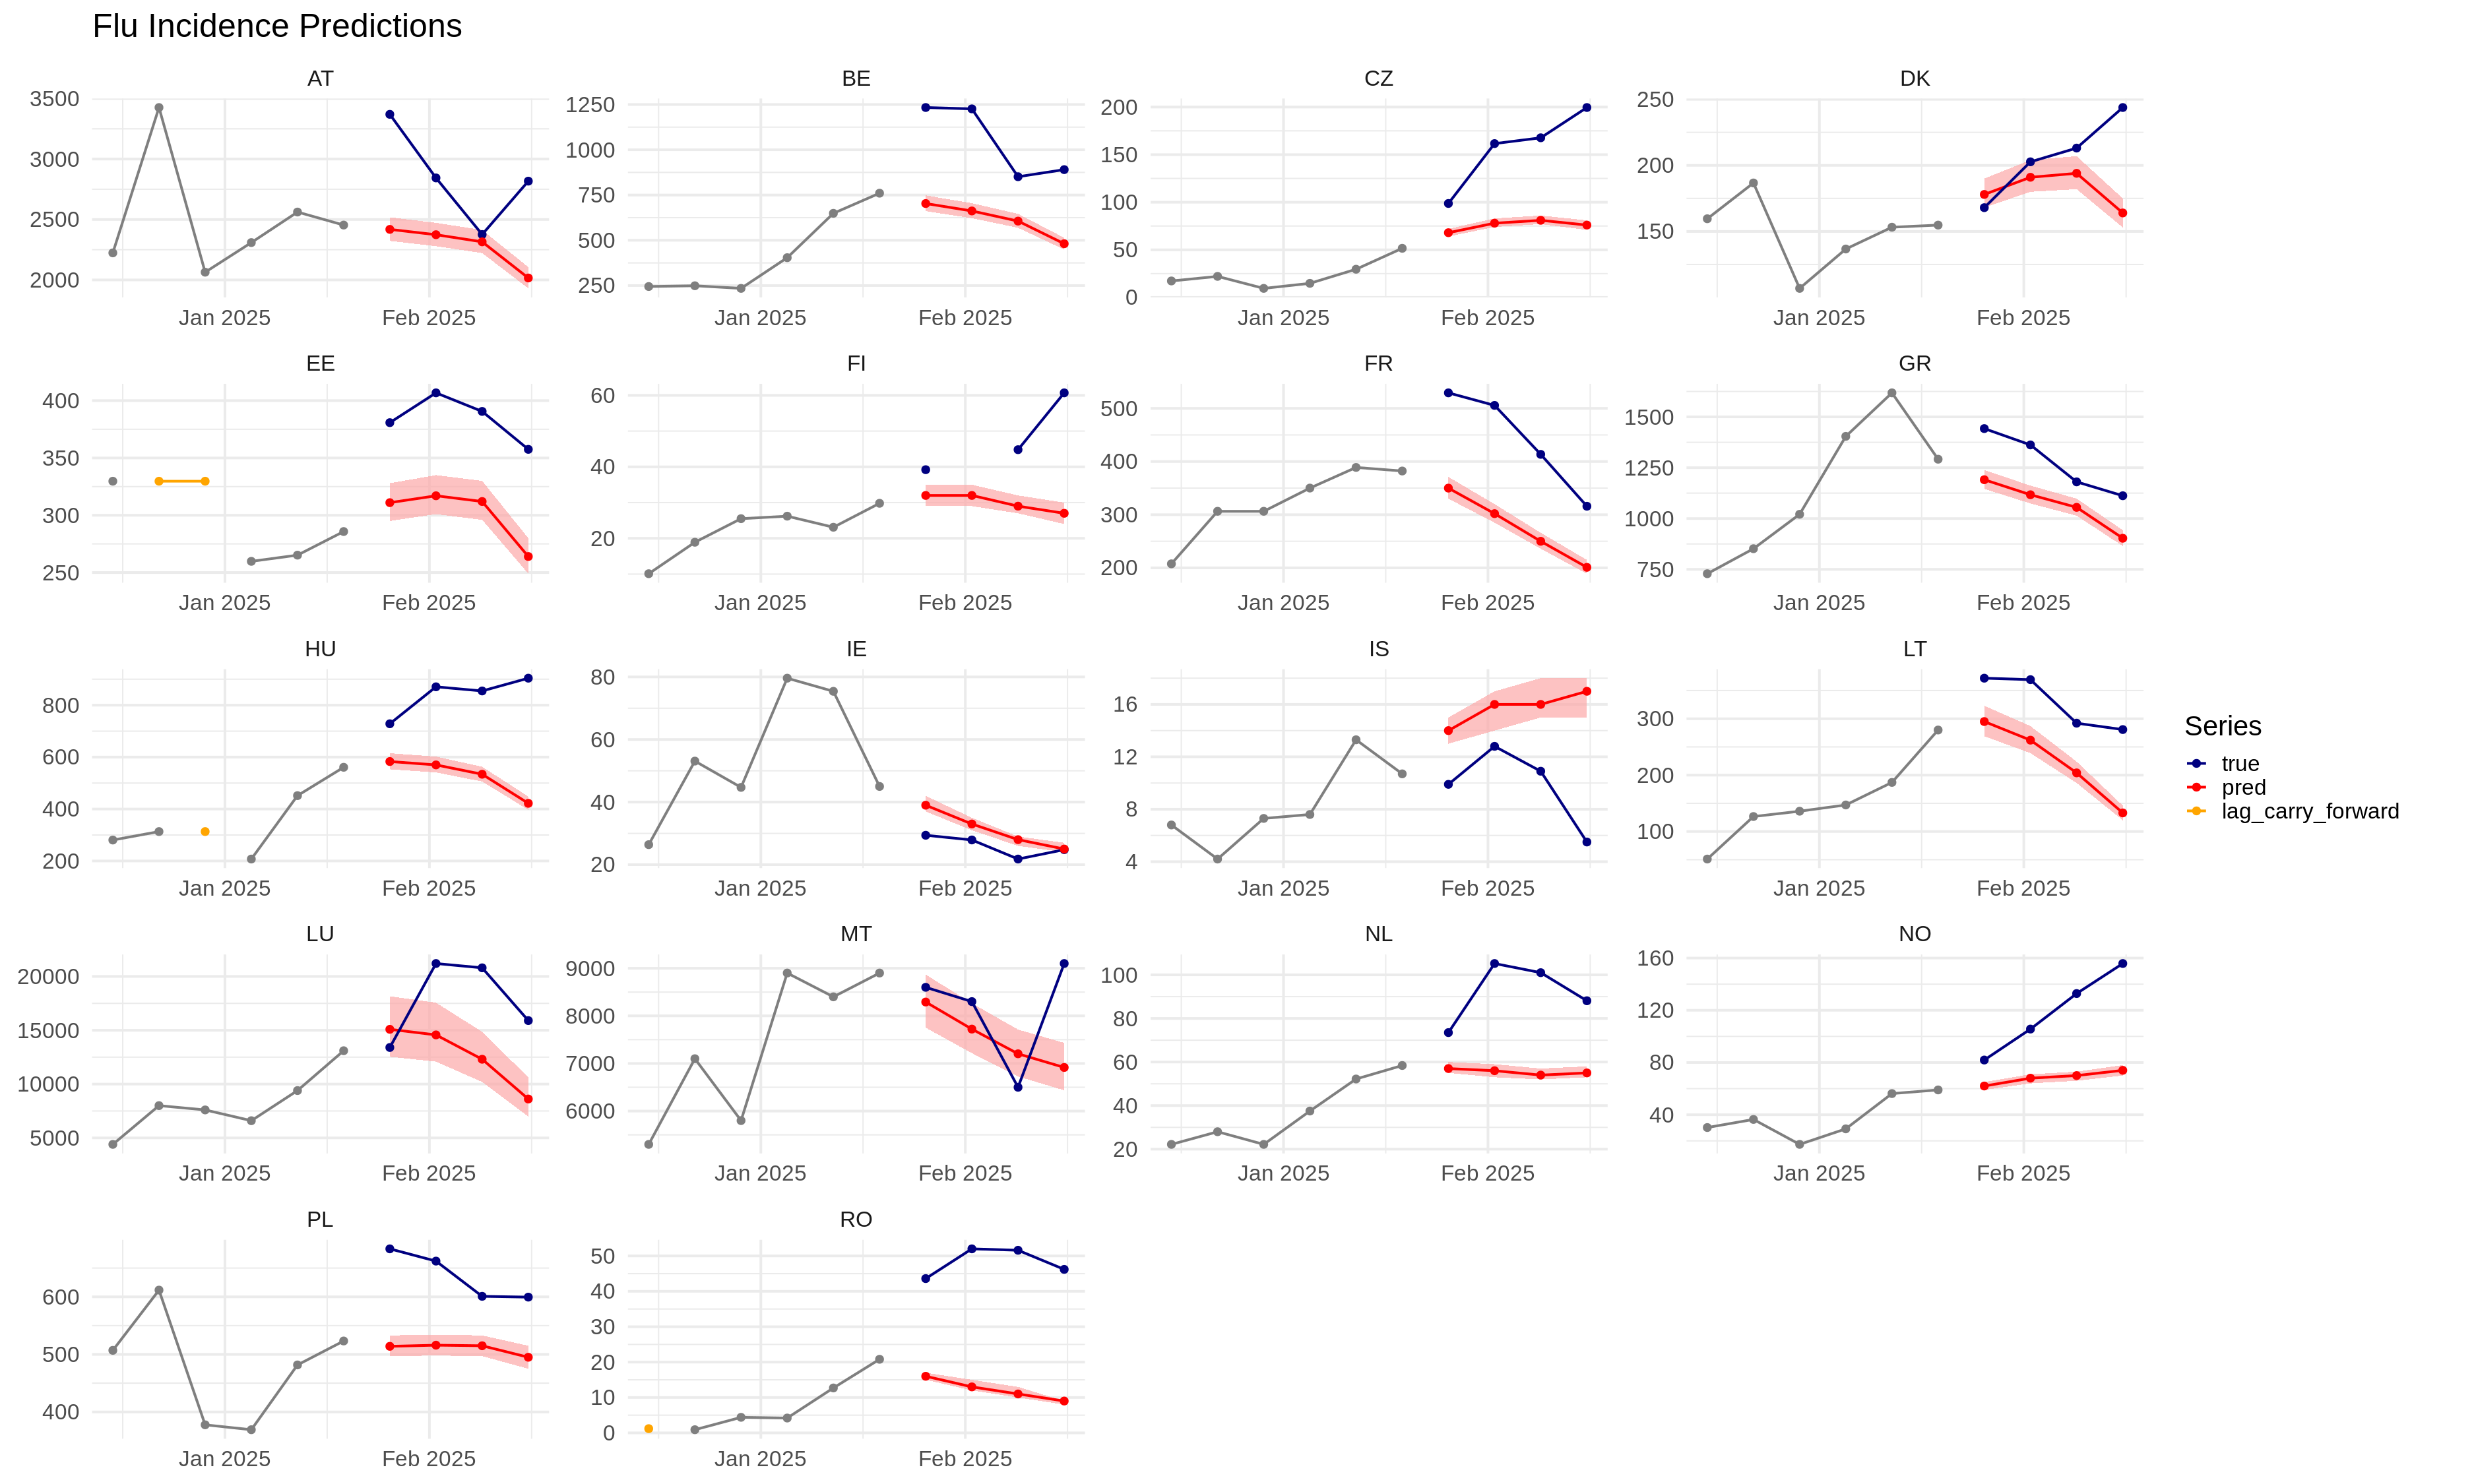

In [84]:
band_df2 <- pdat2 %>%
  filter(series %in% c("upper", "lower")) %>%
  pivot_wider(names_from = series, values_from = value) %>%
  filter(!is.na(lower) & !is.na(upper))


plot_data2 <- pdat2 %>% filter(!series %in% c("upper", "lower"))


options(repr.plot.width = 25, repr.plot.height = 15, repr.plot.res = 150)

ggplot() +
  geom_ribbon(
    data = band_df2,
    aes(x = date, ymin = lower, ymax = upper),
    fill = "#fca7a7", alpha = 0.7
  ) +

  geom_line(data = plot_data2, aes(x = date, y = value, color = series)) +
  geom_point(data = plot_data2, aes(x = date, y = value, color = series),
             size = 1.8, alpha = 1) +

  facet_wrap(~ country, scales = "free", ncol = 4) +
  labs(title = "Flu Incidence Predictions", x = NULL, y = NULL) +
  scale_x_date(date_labels = "%b %Y", date_breaks = "1 month") +
  scale_color_manual(
    breaks = c("true","pred","lag_carry_forward"),   # include all series you mapped
    values = c(true = "navy", pred = "red", lag_carry_forward = "orange"),
    name = "Series"
  ) +
  theme_minimal(base_size = 20)

# Save Files

In [85]:
output_submit_format <- function(pred_plot, target_label = "ILI incidence") {
  # 1) clean & rename
  df <- pred_plot %>%
    mutate(date = as.Date(date),
           location = as.character(country),
           value = pmax(0, as.numeric(value))) %>%
    select(target_end_date = date, location, value)


  h_map <- df %>%
    distinct(target_end_date) %>%
    arrange(target_end_date) %>%
    mutate(horizon = row_number())

  stopifnot(nrow(h_map) == 4L)

  last_train_date <- min(h_map$target_end_date) - 7
  origin_date     <- last_train_date + days(3)


  df %>%
    left_join(h_map, by = "target_end_date") %>%
    mutate(
      origin_date    = origin_date,
      target         = target_label,
      output_type    = "median",
      output_type_id = ""
    ) %>%
    select(origin_date, target, target_end_date, horizon,
           location, output_type, output_type_id, value) %>%
    arrange(origin_date, horizon, location)
}

In [86]:
submission_median <- output_submit_format(pred_plot)
submission_median

origin_date target        target_end_date horizon location output_type
1  2025-01-22  ILI incidence 2025-01-26      1       AT       median     
2  2025-01-22  ILI incidence 2025-01-26      1       BE       median     
3  2025-01-22  ILI incidence 2025-01-26      1       CZ       median     
4  2025-01-22  ILI incidence 2025-01-26      1       DK       median     
5  2025-01-22  ILI incidence 2025-01-26      1       EE       median     
6  2025-01-22  ILI incidence 2025-01-26      1       FI       median     
7  2025-01-22  ILI incidence 2025-01-26      1       FR       median     
8  2025-01-22  ILI incidence 2025-01-26      1       GR       median     
9  2025-01-22  ILI incidence 2025-01-26      1       HU       median     
10 2025-01-22  ILI incidence 2025-01-26      1       IE       median     
11 2025-01-22  ILI incidence 2025-01-26      1       IS       median     
12 2025-01-22  ILI incidence 2025-01-26      1       LT       median     
13 2025-01-22  ILI incidence 2025-01-26      1       LU       median     
14 2025-01-22  ILI incidence 2025-01-26      1       MT       median     
15 2025-01-22  ILI incidence 2025-01-26      1       NL       median     
16 2025-01-22  ILI incidence 2025-01-26      1       NO       median     
17 2025-01-22  ILI incidence 2025-01-26      1       PL       median     
18 2025-01-22  ILI incidence 2025-01-26      1       RO       median     
19 2025-01-22  ILI incidence 2025-02-02      2       AT       median     
20 2025-01-22  ILI incidence 2025-02-02      2       BE       median     
21 2025-01-22  ILI incidence 2025-02-02      2       CZ       median     
22 2025-01-22  ILI incidence 2025-02-02      2       DK       median     
23 2025-01-22  ILI incidence 2025-02-02      2       EE       median     
24 2025-01-22  ILI incidence 2025-02-02      2       FI       median     
25 2025-01-22  ILI incidence 2025-02-02      2       FR       median     
26 2025-01-22  ILI incidence 2025-02-02      2       GR       median     
27 2025-01-22  ILI incidence 2025-02-02      2       HU       median     
28 2025-01-22  ILI incidence 2025-02-02      2       IE       median     
29 2025-01-22  ILI incidence 2025-02-02      2       IS       median     
30 2025-01-22  ILI incidence 2025-02-02      2       LT       median     
⋮  ⋮           ⋮             ⋮               ⋮       ⋮        ⋮          
43 2025-01-22  ILI incidence 2025-02-09      3       FR       median     
44 2025-01-22  ILI incidence 2025-02-09      3       GR       median     
45 2025-01-22  ILI incidence 2025-02-09      3       HU       median     
46 2025-01-22  ILI incidence 2025-02-09      3       IE       median     
47 2025-01-22  ILI incidence 2025-02-09      3       IS       median     
48 2025-01-22  ILI incidence 2025-02-09      3       LT       median     
49 2025-01-22  ILI incidence 2025-02-09      3       LU       median     
50 2025-01-22  ILI incidence 2025-02-09      3       MT       median     
51 2025-01-22  ILI incidence 2025-02-09      3       NL       median     
52 2025-01-22  ILI incidence 2025-02-09      3       NO       median     
53 2025-01-22  ILI incidence 2025-02-09      3       PL       median     
54 2025-01-22  ILI incidence 2025-02-09      3       RO       median     
55 2025-01-22  ILI incidence 2025-02-16      4       AT       median     
56 2025-01-22  ILI incidence 2025-02-16      4       BE       median     
57 2025-01-22  ILI incidence 2025-02-16      4       CZ       median     
58 2025-01-22  ILI incidence 2025-02-16      4       DK       median     
59 2025-01-22  ILI incidence 2025-02-16      4       EE       median     
60 2025-01-22  ILI incidence 2025-02-16      4       FI       median     
61 2025-01-22  ILI incidence 2025-02-16      4       FR       median     
62 2025-01-22  ILI incidence 2025-02-16      4       GR       median     
63 2025-01-22  ILI incidence 2025-02-16      4       HU       median     
64 2025-01-22  ILI incidence 2025-02-16      4       IE       median     
65 2025

In [87]:
# library(googledrive)

In [88]:
# write_csv(ts_clean, "ts_clean.csv")

# folder <- drive_get("Flu Forecast")
# drive_upload(
#   media = "ts_clean.csv",
#   path  = as_id(folder$id),
#   name  = "ts_clean.csv",
#   overwrite = TRUE
# )


In [89]:
# write_csv(marked_df, "ili_marked.csv")

# folder <- drive_get("Flu Forecast")
# drive_upload(
#   media = "ili_marked.csv",
#   path  = as_id(folder$id),
#   name  = "ili_marked.csv",
#   overwrite = TRUE
# )


In [90]:
# write_csv(pdat, "pred_check.csv")

# folder <- drive_get("Flu Forecast")
# drive_upload(
#   media = "pred_check.csv",
#   path  = as_id(folder$id),
#   name  = "pred_check.csv",
#   overwrite = TRUE
# )
